In [89]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import missingno as msno
import matplotlib.dates as mdates


In [90]:
#Let's load our dataset
df = pd.read_csv("Volve production data_CSV.csv")

In [91]:
#let's explore the shape of our dataset
df.shape

(15832, 24)

In [92]:
#Let's look at our data
df.head(5)

DATEPRD WELL_BORE_CODE  NPD_WELL_BORE_CODE NPD_WELL_BORE_NAME  \
0  2014-04-07  NO 15/9-F-1 C                7405         15/9-F-1 C   
1  2014-04-08  NO 15/9-F-1 C                7405         15/9-F-1 C   
2  2014-04-09  NO 15/9-F-1 C                7405         15/9-F-1 C   
3  2014-04-10  NO 15/9-F-1 C                7405         15/9-F-1 C   
4  2014-04-11  NO 15/9-F-1 C                7405         15/9-F-1 C   

   NPD_FIELD_CODE NPD_FIELD_NAME  NPD_FACILITY_CODE NPD_FACILITY_NAME  \
0         3420717          VOLVE             369304    MÆRSK INSPIRER   
1         3420717          VOLVE             369304    MÆRSK INSPIRER   
2         3420717          VOLVE             369304    MÆRSK INSPIRER   
3         3420717          VOLVE             369304    MÆRSK INSPIRER   
4         3420717          VOLVE             369304    MÆRSK INSPIRER   

   ON_STREAM_HRS  AVG_DOWNHOLE_PRESSURE  AVG_DOWNHOLE_TEMPERATURE  \
0            0.0                0.00000                   0.00000   
1            0.0                    NaN                       NaN   
2            0.0                    NaN                       NaN   
3            0.0                    NaN                       NaN   
4            0.0              310.37614                  96.87589   

   AVG_DP_TUBING  AVG_ANNULUS_PRESS  AVG_CHOKE_SIZE_P AVG_CHOKE_UOM  \
0        0.00000                0.0          0.000000             %   
1            NaN                0.0          1.003059             %   
2            NaN                0.0          0.979008             %   
3            NaN                0.0          0.545759             %   
4      277.27826                0.0          1.215987             %   

   AVG_WHP_P  AVG_WHT_P  DP_CHOKE_SIZE  BORE_OIL_VOL  BORE_GAS_VOL  \
0    0.00000    0.00000        0.00000           0.0           0.0   
1    0.00000    0.00000        0.00000           0.0           0.0   
2    0.00000    0.00000        0.00000           0.0           0.0   
3    0.00000    0.00000        0.00000           0.0           0.0   
4   33.09788   10.47992       33.07195           0.0           0.0   

   BORE_WAT_VOL  BORE_WI_VOL   FLOW_KIND WELL_TYPE  
0           0.0          NaN  production        OP  
1           0.0          NaN  production        OP  
2           0.0          NaN  production        OP  
3           0.0          NaN  production        OP  
4           0.0          NaN  production        OP

In [93]:
df.columns

Index(['DATEPRD', 'WELL_BORE_CODE', 'NPD_WELL_BORE_CODE', 'NPD_WELL_BORE_NAME',
       'NPD_FIELD_CODE', 'NPD_FIELD_NAME', 'NPD_FACILITY_CODE',
       'NPD_FACILITY_NAME', 'ON_STREAM_HRS', 'AVG_DOWNHOLE_PRESSURE',
       'AVG_DOWNHOLE_TEMPERATURE', 'AVG_DP_TUBING', 'AVG_ANNULUS_PRESS',
       'AVG_CHOKE_SIZE_P', 'AVG_CHOKE_UOM', 'AVG_WHP_P', 'AVG_WHT_P',
       'DP_CHOKE_SIZE', 'BORE_OIL_VOL', 'BORE_GAS_VOL', 'BORE_WAT_VOL',
       'BORE_WI_VOL', 'FLOW_KIND', 'WELL_TYPE'],
      dtype='object')

In [94]:
#Let's see th unique values for each column
for column in df.columns:
    unique_values = df[column].unique()
    print(f"{column}': {unique_values}")

DATEPRD': ['2014-04-07' '2014-04-08' '2014-04-09' ... '2009-12-22 16:24:17'
 '2009-12-23 21:44:33' '2009-12-25 19:34:50']
WELL_BORE_CODE': ['NO 15/9-F-1 C' 'NO 15/9-F-11 H' 'NO 15/9-F-12 H' 'NO 15/9-F-14 H'
 'NO 15/9-F-15 D' 'NO 15/9-F-4 AH' 'NO 15/9-F-5 AH' 'NO 15/9-F-15 C']
NPD_WELL_BORE_CODE': [7405 7078 5599 5351 7289 5693 5769]
NPD_WELL_BORE_NAME': ['15/9-F-1 C' '15/9-F-11' '15/9-F-12' '15/9-F-14' '15/9-F-15 D' '15/9-F-4'
 '15/9-F-5' '15/9-F-15']
NPD_FIELD_CODE': [3420717]
NPD_FIELD_NAME': ['VOLVE']
NPD_FACILITY_CODE': [369304]
NPD_FACILITY_NAME': ['MÆRSK INSPIRER']
ON_STREAM_HRS': [ 0.         11.5        24.         ... 18.775      29.33777778
 45.83805556]
AVG_DOWNHOLE_PRESSURE': [  0.            nan 310.37614 ... 275.92102 275.53076 274.99036]
AVG_DOWNHOLE_TEMPERATURE': [ 0.           nan 96.87589 ... 89.61392 90.03433 89.95534]
AVG_DP_TUBING': [  0.            nan 277.27826 ... 341.72773 345.90677 345.60328]
AVG_ANNULUS_PRESS': [0.          nan 2.88536 ... 0.28686 0.28604 0.2

In [95]:
#In order to display all columns in pandas output, we have to change the pandas setting option
pd.set_option('display.max_columns', None)

print(df.isnull().sum())


DATEPRD                         0
WELL_BORE_CODE                  0
NPD_WELL_BORE_CODE              0
NPD_WELL_BORE_NAME              0
NPD_FIELD_CODE                  0
NPD_FIELD_NAME                  0
NPD_FACILITY_CODE               0
NPD_FACILITY_NAME               0
ON_STREAM_HRS                 285
AVG_DOWNHOLE_PRESSURE        6654
AVG_DOWNHOLE_TEMPERATURE     6852
AVG_DP_TUBING                6852
AVG_ANNULUS_PRESS            7942
AVG_CHOKE_SIZE_P             6913
AVG_CHOKE_UOM                6671
AVG_WHP_P                    6479
AVG_WHT_P                    6686
DP_CHOKE_SIZE                 492
BORE_OIL_VOL                 6473
BORE_GAS_VOL                 6473
BORE_WAT_VOL                 6473
BORE_WI_VOL                 10126
FLOW_KIND                       0
WELL_TYPE                       0
dtype: int64


In [96]:
#Let's take a look at our data from statistics point
df.describe().T

count          mean            std         min  \
NPD_WELL_BORE_CODE        15832.0  5.925846e+03     663.147678     5351.00   
NPD_FIELD_CODE            15832.0  3.420717e+06       0.000000  3420717.00   
NPD_FACILITY_CODE         15832.0  3.693040e+05       0.000000   369304.00   
ON_STREAM_HRS             15547.0  2.019455e+01       8.931579        0.00   
AVG_DOWNHOLE_PRESSURE      9178.0  1.836084e+02     109.222496        0.00   
AVG_DOWNHOLE_TEMPERATURE   8980.0  7.716297e+01      45.657948        0.00   
AVG_DP_TUBING              8980.0  1.540288e+02      76.752373        0.00   
AVG_ANNULUS_PRESS          7890.0  1.485610e+01       8.406822        0.00   
AVG_CHOKE_SIZE_P           8919.0  5.516853e+01      36.692924        0.00   
AVG_WHP_P                  9353.0  4.441718e+01      25.345494        0.00   
AVG_WHT_P                  9146.0  6.772844e+01      27.719028        0.00   
DP_CHOKE_SIZE             15340.0  1.144106e+01      19.816928        0.00   
BORE_OIL_VOL               9359.0  1.075778e+03    1317.230128        0.00   
BORE_GAS_VOL               9359.0  1.580993e+05  187321.566850        0.00   
BORE_WAT_VOL               9359.0  1.640521e+03    1703.157446     -457.84   
BORE_WI_VOL                5706.0  5.315481e+03    2181.486695        0.00   

                                   25%           50%           75%  \
NPD_WELL_BORE_CODE        5.599000e+03  5.693000e+03  5.769000e+03   
NPD_FIELD_CODE            3.420717e+06  3.420717e+06  3.420717e+06   
NPD_FACILITY_CODE         3.693040e+05  3.693040e+05  3.693040e+05   
ON_STREAM_HRS             2.399075e+01  2.400000e+01  2.400000e+01   
AVG_DOWNHOLE_PRESSURE     0.000000e+00  2.347281e+02  2.569206e+02   
AVG_DOWNHOLE_TEMPERATURE  0.000000e+00  1.031867e+02  1.062766e+02   
AVG_DP_TUBING             8.366536e+01  1.755889e+02  2.043200e+02   
AVG_ANNULUS_PRESS         1.084144e+01  1.630860e+01  2.130613e+01   
AVG_CHOKE_SIZE_P          1.895299e+01  5.209688e+01  9.992429e+01   
AVG_WHP_P                 3.086972e+01  3.727322e+01  5.636641e+01   
AVG_WHT_P                 5.657783e+01  8.007125e+01  8.806220e+01   
DP_CHOKE_SIZE             0.000000e+00  2.384969e+00  1.376502e+01   
BORE_OIL_VOL              1.876600e+02  5.404000e+02  1.311265e+03   
BORE_GAS_VOL              2.886573e+04  8.491009e+04  1.996189e+05   
BORE_WAT_VOL              1.177500e+01  8.965900e+02  3.239755e+03   
BORE_WI_VOL               4.338205e+03  5.504740e+03  6.781058e+03   

                                   max  
NPD_WELL_BORE_CODE        7.405000e+03  
NPD_FIELD_CODE            3.420717e+06  
NPD_FACILITY_CODE         3.693040e+05  
ON_STREAM_HRS             1.200000e+02  
AVG_DOWNHOLE_PRESSURE     3.975885e+02  
AVG_DOWNHOLE_TEMPERATURE  1.085022e+02  
AVG_DP_TUBING             3.459068e+02  
AVG_ANNULUS_PRESS         3.001983e+01  
AVG_CHOKE_SIZE_P          1.000000e+02  
AVG_WHP_P                 1.373110e+02  
AVG_WHT_P                 9.350958e+01  
DP_CHOKE_SIZE             1.257186e+02  
BORE_OIL_VOL              5.901840e+03  
BORE_GAS_VOL              8.511315e+05  
BORE_WAT_VOL              8.019740e+03  
BORE_WI_VOL               1.001360e+04

In [97]:
df.info

<bound method DataFrame.info of                    DATEPRD  WELL_BORE_CODE  NPD_WELL_BORE_CODE  \
0               2014-04-07   NO 15/9-F-1 C                7405   
1               2014-04-08   NO 15/9-F-1 C                7405   
2               2014-04-09   NO 15/9-F-1 C                7405   
3               2014-04-10   NO 15/9-F-1 C                7405   
4               2014-04-11   NO 15/9-F-1 C                7405   
...                    ...             ...                 ...   
15827  2009-12-21 09:36:49  NO 15/9-F-15 C                7289   
15828  2009-12-21 21:37:47  NO 15/9-F-15 C                7289   
15829  2009-12-22 16:24:17  NO 15/9-F-15 C                7289   
15830  2009-12-23 21:44:33  NO 15/9-F-15 C                7289   
15831  2009-12-25 19:34:50  NO 15/9-F-15 C                7289   

      NPD_WELL_BORE_NAME  NPD_FIELD_CODE NPD_FIELD_NAME  NPD_FACILITY_CODE  \
0             15/9-F-1 C         3420717          VOLVE             369304   
1             15/9-

In [98]:
#Let's check for missing values
df_nan = df.isnull()
df_nan

DATEPRD  WELL_BORE_CODE  NPD_WELL_BORE_CODE  NPD_WELL_BORE_NAME  \
0        False           False               False               False   
1        False           False               False               False   
2        False           False               False               False   
3        False           False               False               False   
4        False           False               False               False   
...        ...             ...                 ...                 ...   
15827    False           False               False               False   
15828    False           False               False               False   
15829    False           False               False               False   
15830    False           False               False               False   
15831    False           False               False               False   

       NPD_FIELD_CODE  NPD_FIELD_NAME  NPD_FACILITY_CODE  NPD_FACILITY_NAME  \
0               False           False              False              False   
1               False           False              False              False   
2               False           False              False              False   
3               False           False              False              False   
4               False           False              False              False   
...               ...             ...                ...                ...   
15827           False           False              False              False   
15828           False           False              False              False   
15829           False           False              False              False   
15830           False           False              False              False   
15831           False           False              False              False   

       ON_STREAM_HRS  AVG_DOWNHOLE_PRESSURE  AVG_DOWNHOLE_TEMPERATURE  \
0              False                  False                     False   
1              False                   True                      True   
2              False                   True                      True   
3              False                   True                      True   
4              False                  False                     False   
...              ...                    ...                       ...   
15827          False                  False                      True   
15828          False                  False                      True   
15829          False                  False                      True   
15830          False                  False                      True   
15831          False                  False                      True   

       AVG_DP_TUBING  AVG_ANNULUS_PRESS  AVG_CHOKE_SIZE_P  AVG_CHOKE_UOM  \
0              False              False             False          False   
1               True              False             False          False   
2               True              False             False          False   
3               True              False             False          False   
4              False              False             False          False   
...              ...                ...               ...            ...   
15827           True               True              True           True   
15828           True               True              True           True   
15829           True               True              True           True   
15830           True               True              True           True   
15831           True               True              True           True   

       AVG_WHP_P  AVG_WHT_P  DP_CHOKE_SIZE  BORE_OIL_VOL  BORE_GAS_VOL  \
0          False      False          False         False         False   
1          False      False          False         False         False   
2          False      False          False         False         False   
3          False      False          False         False         False   
4        

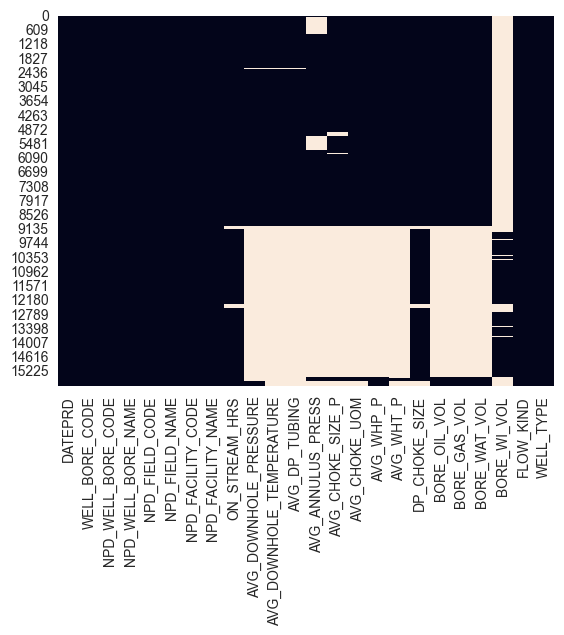

In [99]:
 # Check for missing values using visualization
sns.heatmap(df_nan, cbar=False)
plt.show()

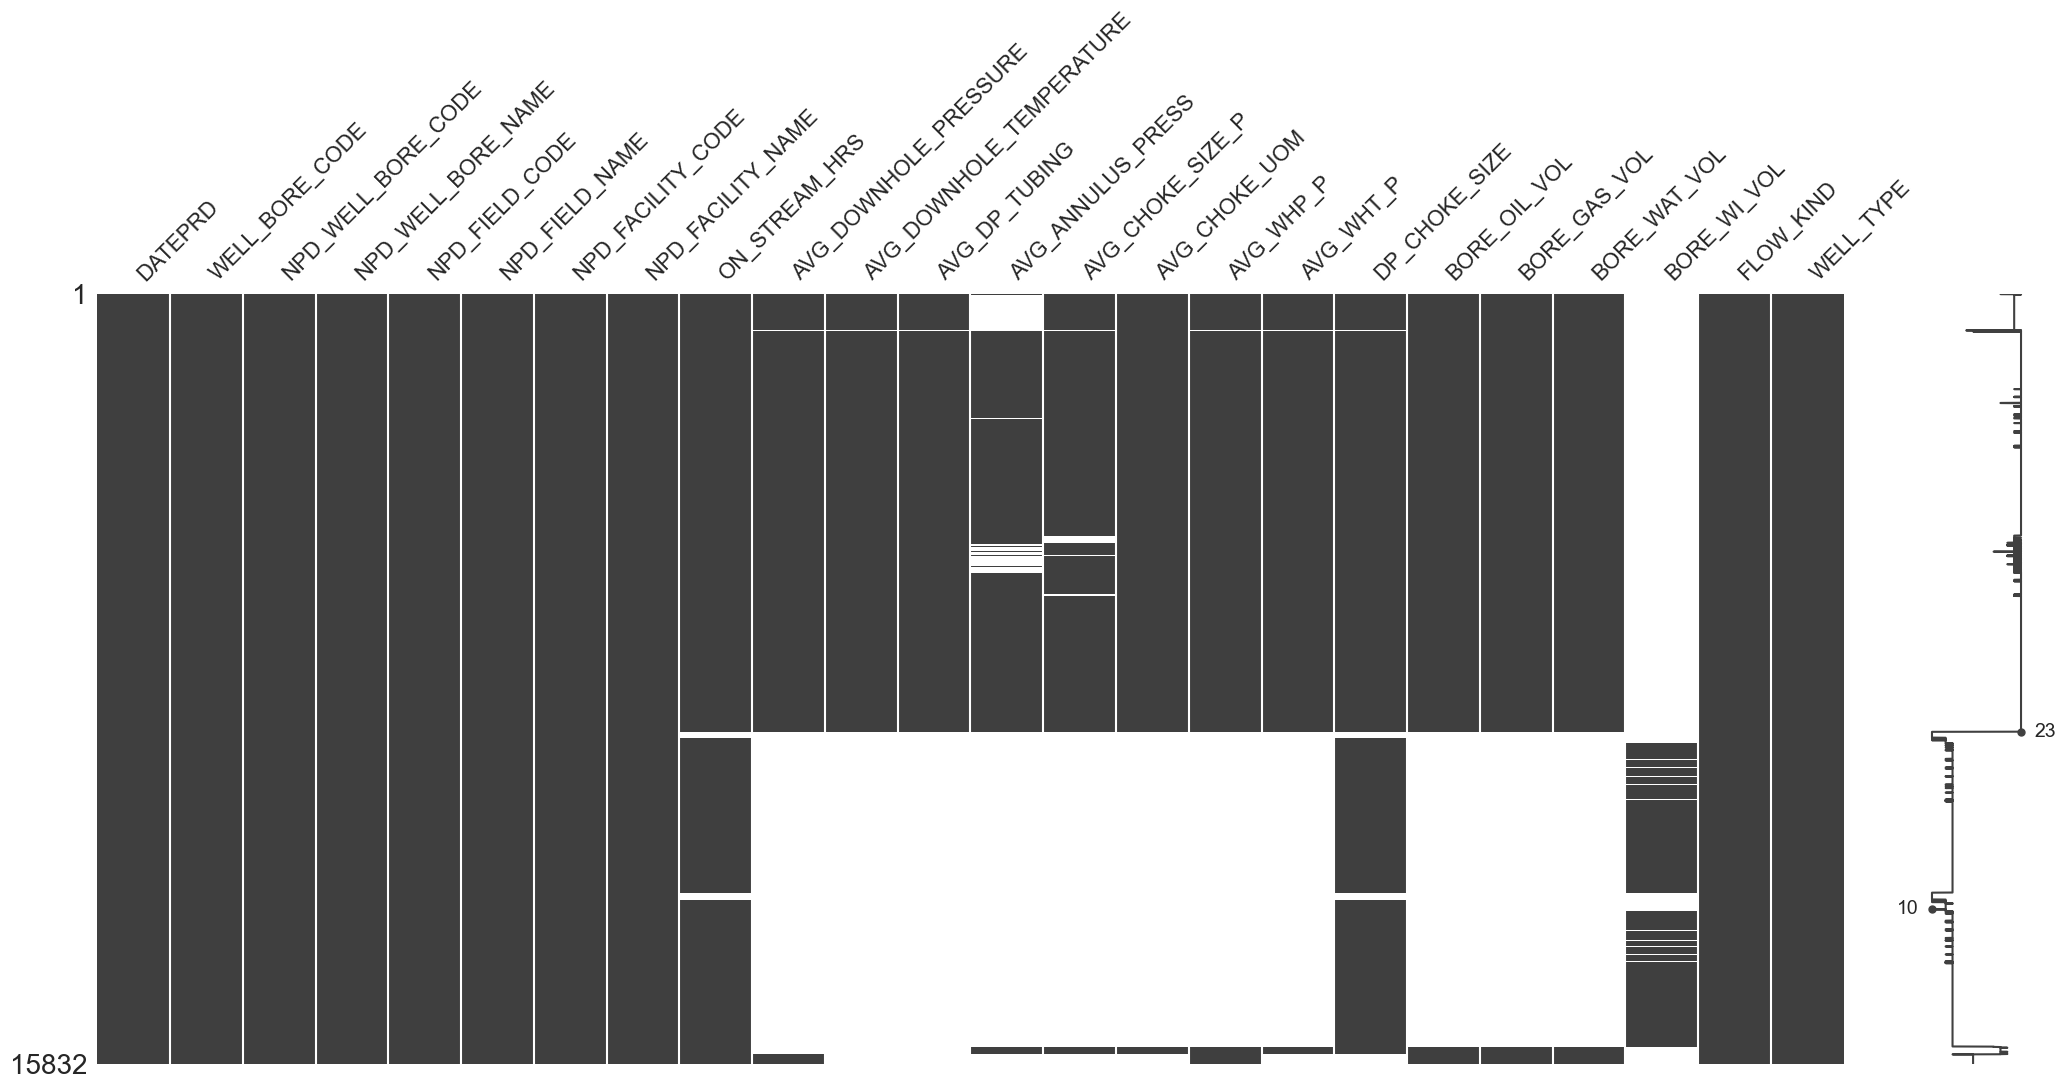

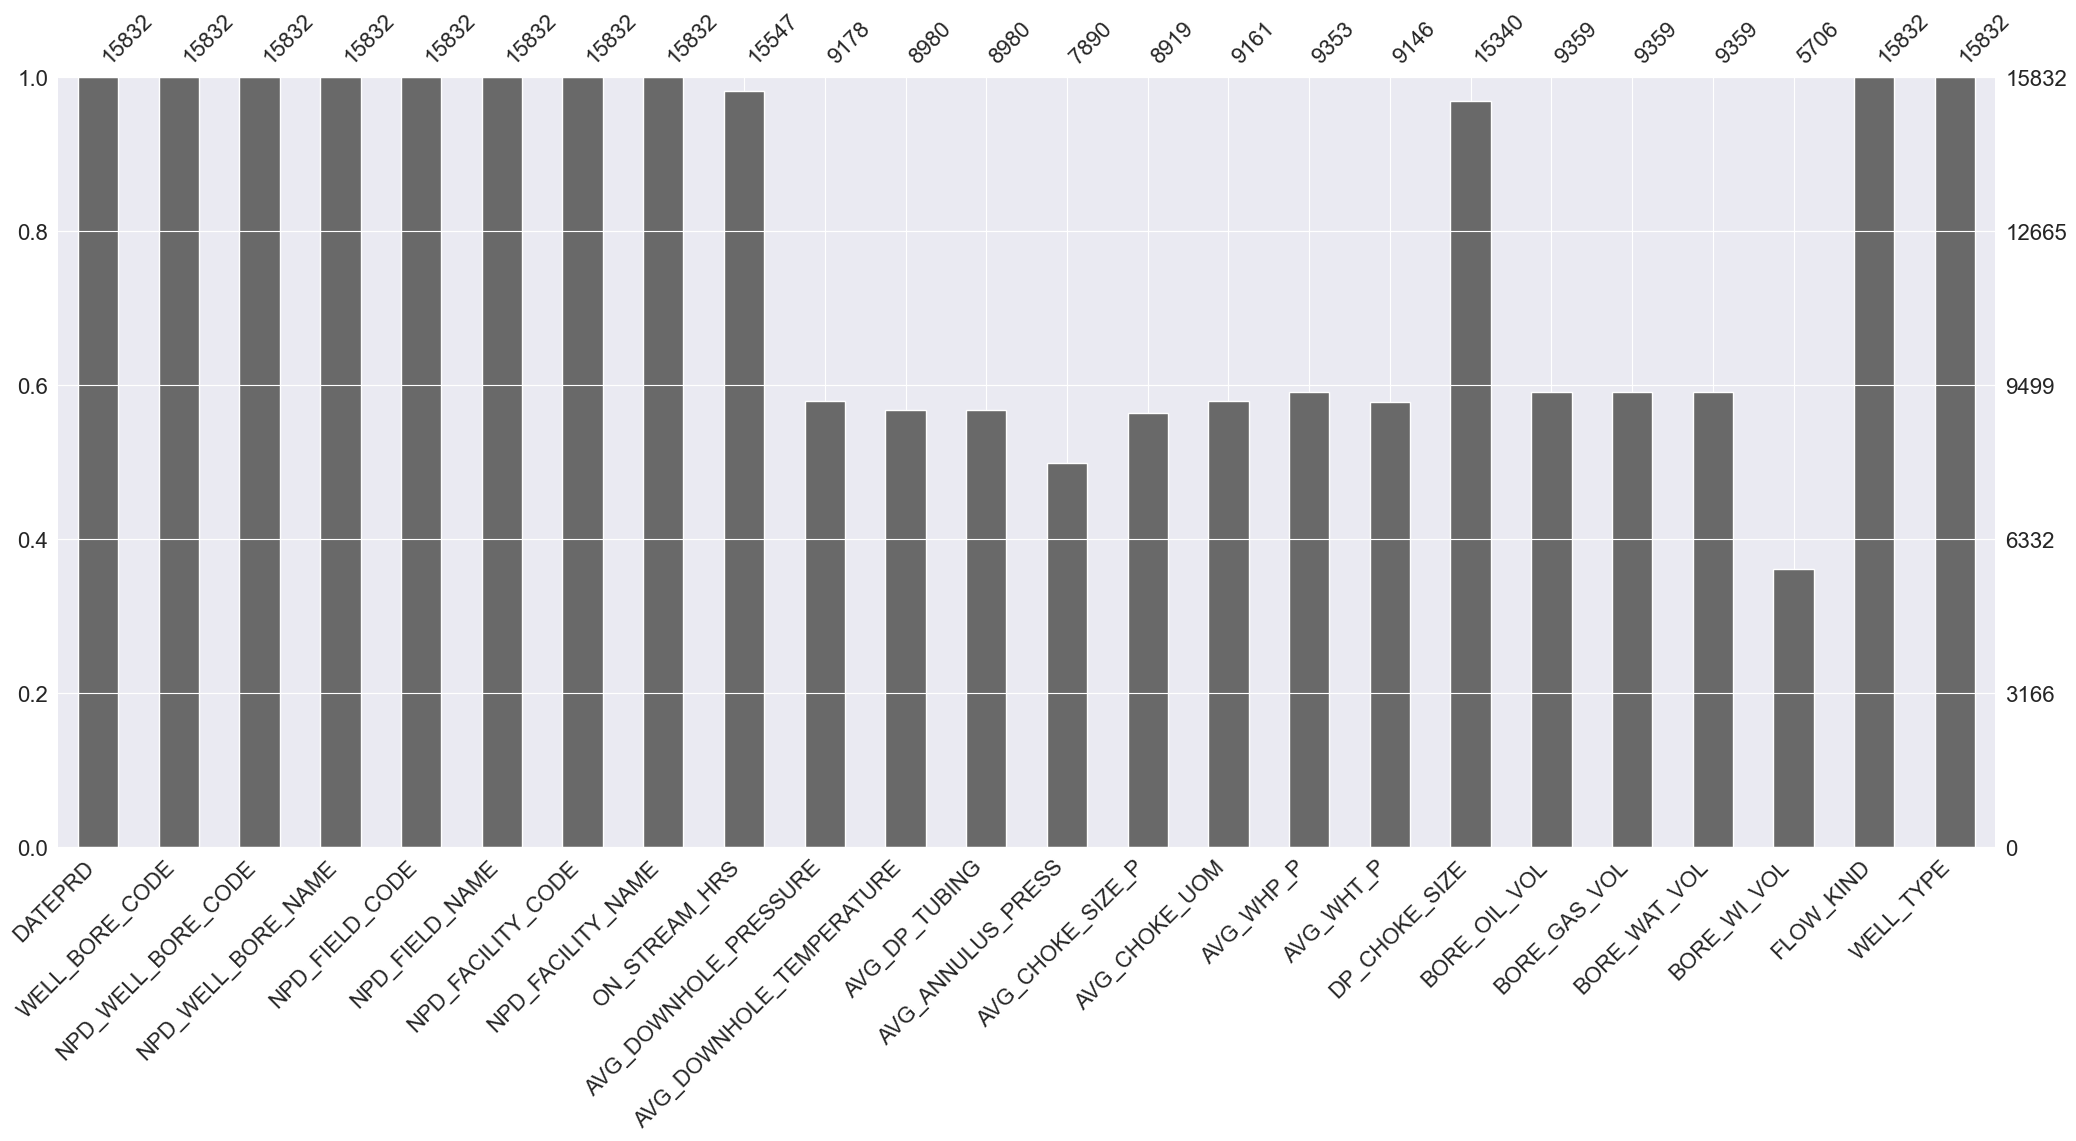

In [100]:
#Let's visualize the missing values in our dataset
msno.matrix(df)
plt.show()

# Plot a bar chart to show the completeness of each column
msno.bar(df)
plt.show()


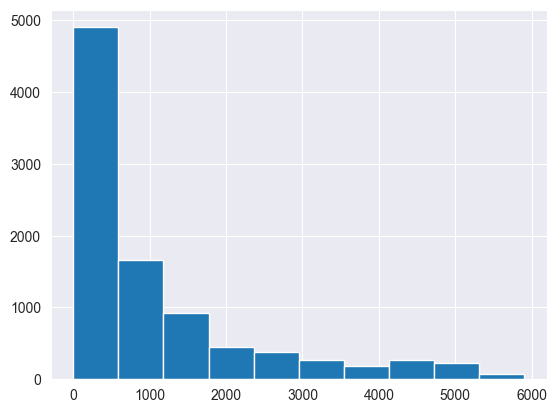

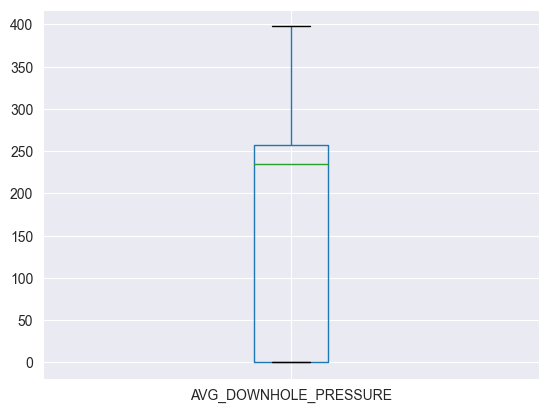

In [101]:
# Histogram for BORE_OIL_VOL
df['BORE_OIL_VOL'].hist()
plt.show()

# Boxplot for AVG_DOWNHOLE_PRESSURE
df.boxplot(column='AVG_DOWNHOLE_PRESSURE')
plt.show()


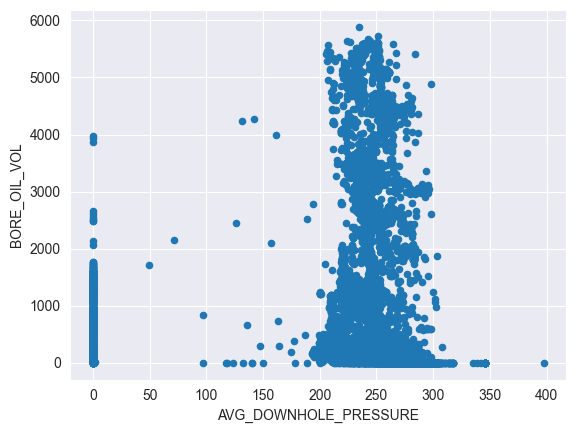

In [14]:
# Let's visualize some of the features that may have effects on production rate using Scatter Plot:

# 1.  Downhole Pressure vs Oil Production Rate
df.plot.scatter(x='AVG_DOWNHOLE_PRESSURE', y='BORE_OIL_VOL')
plt.show()


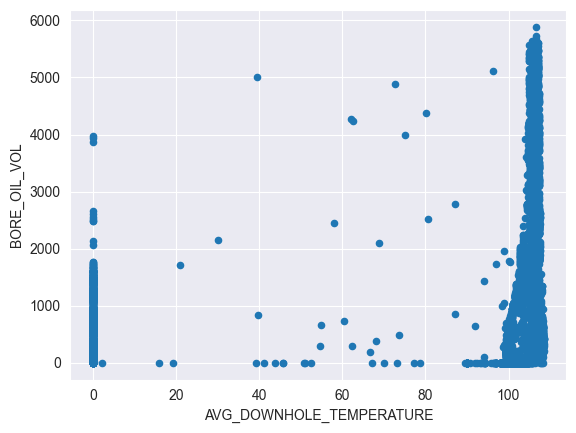

In [15]:
#2. Downhole temperature vs Oil Production Rate
df.plot.scatter(x='AVG_DOWNHOLE_TEMPERATURE', y='BORE_OIL_VOL')
plt.show()


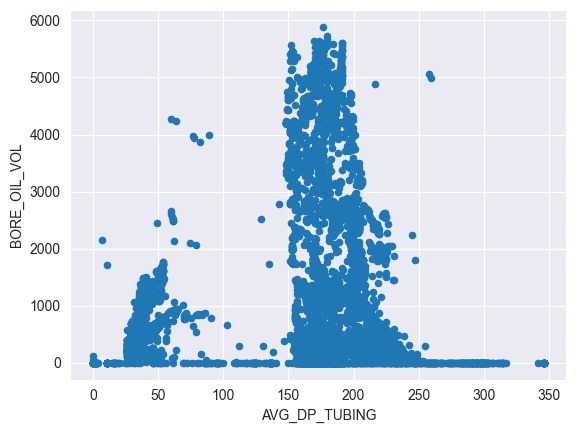

In [16]:
# 3.Tubing Pressure vs Oil Production Rate
df.plot.scatter(x='AVG_DP_TUBING', y='BORE_OIL_VOL')
plt.show()


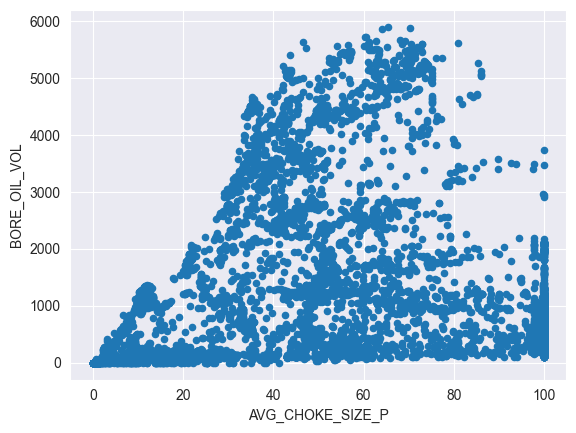

In [17]:
# 4.Choke Size vs Oil Production Rate
df.plot.scatter(x='AVG_CHOKE_SIZE_P', y='BORE_OIL_VOL')
plt.show()


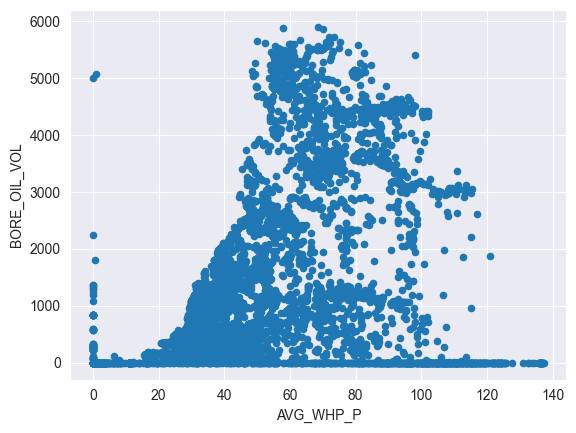

In [18]:
# 5.Wellhead Pressure vs Oil Production Rate
df.plot.scatter(x='AVG_WHP_P', y='BORE_OIL_VOL')
plt.show()


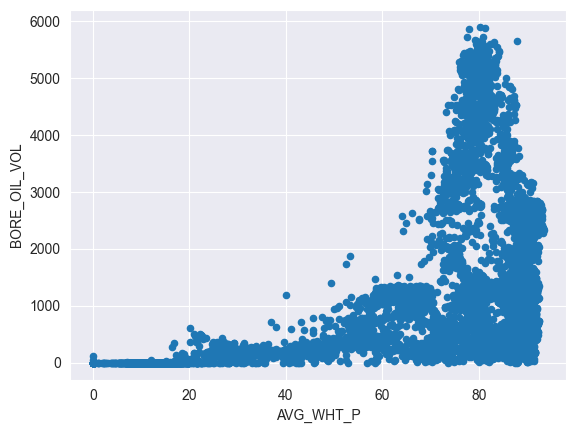

In [19]:
# 6.Wellhead Temperature vs Oil Production Rate
df.plot.scatter(x='AVG_WHT_P', y='BORE_OIL_VOL')
plt.show()


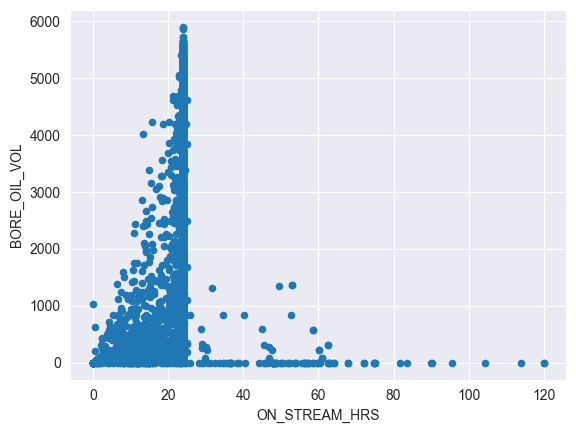

In [20]:
# 7. On Stream Hours vs Oil Production Rate
df.plot.scatter(x='ON_STREAM_HRS', y='BORE_OIL_VOL')
plt.show()


C:\Users\algak\AppData\Local\Temp\ipykernel_18400\497135639.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


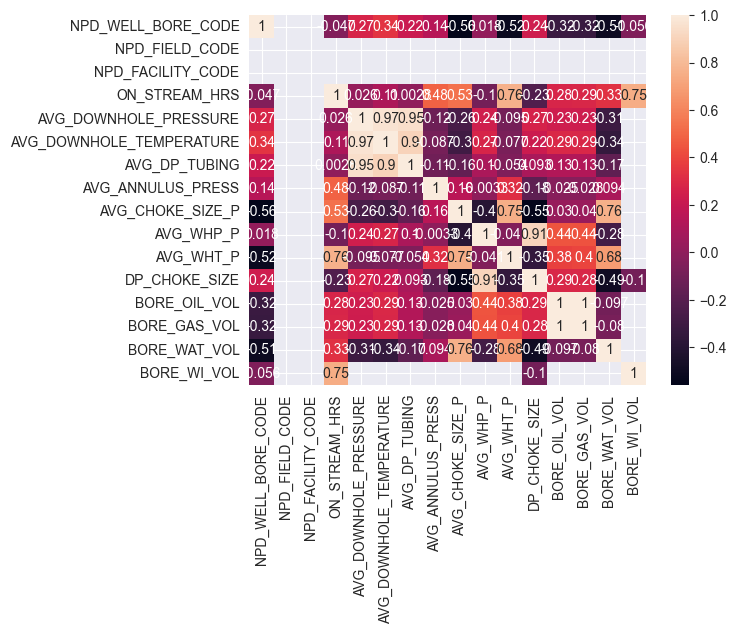

In [21]:
# Correlation matrix
corr = df.corr()
sns.heatmap(corr, annot=True)
plt.show()


In [102]:
# Detect outliers in AVG_DOWNHOLE_PRESSURE using the Z-score method
from scipy import stats
z_scores = stats.zscore(df['AVG_DOWNHOLE_PRESSURE'])
abs_z_scores = abs(z_scores)
outlier_mask = abs_z_scores > 2
outliers = df[outlier_mask]
print(outliers)


Empty DataFrame
Columns: [DATEPRD, WELL_BORE_CODE, NPD_WELL_BORE_CODE, NPD_WELL_BORE_NAME, NPD_FIELD_CODE, NPD_FIELD_NAME, NPD_FACILITY_CODE, NPD_FACILITY_NAME, ON_STREAM_HRS, AVG_DOWNHOLE_PRESSURE, AVG_DOWNHOLE_TEMPERATURE, AVG_DP_TUBING, AVG_ANNULUS_PRESS, AVG_CHOKE_SIZE_P, AVG_CHOKE_UOM, AVG_WHP_P, AVG_WHT_P, DP_CHOKE_SIZE, BORE_OIL_VOL, BORE_GAS_VOL, BORE_WAT_VOL, BORE_WI_VOL, FLOW_KIND, WELL_TYPE]
Index: []


In [23]:
# Display the correlation matrix
df.corr().T


C:\Users\algak\AppData\Local\Temp\ipykernel_18400\4233611191.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr().T


NPD_WELL_BORE_CODE  NPD_FIELD_CODE  \
NPD_WELL_BORE_CODE                  1.000000             NaN   
NPD_FIELD_CODE                           NaN             NaN   
NPD_FACILITY_CODE                        NaN             NaN   
ON_STREAM_HRS                      -0.047017             NaN   
AVG_DOWNHOLE_PRESSURE               0.273812             NaN   
AVG_DOWNHOLE_TEMPERATURE            0.339509             NaN   
AVG_DP_TUBING                       0.218243             NaN   
AVG_ANNULUS_PRESS                   0.141756             NaN   
AVG_CHOKE_SIZE_P                   -0.558461             NaN   
AVG_WHP_P                           0.017795             NaN   
AVG_WHT_P                          -0.519515             NaN   
DP_CHOKE_SIZE                       0.237647             NaN   
BORE_OIL_VOL                       -0.320758             NaN   
BORE_GAS_VOL                       -0.324674             NaN   
BORE_WAT_VOL                       -0.505172             NaN   
BORE_WI_VOL                        -0.055894             NaN   

                          NPD_FACILITY_CODE  ON_STREAM_HRS  \
NPD_WELL_BORE_CODE                      NaN      -0.047017   
NPD_FIELD_CODE                          NaN            NaN   
NPD_FACILITY_CODE                       NaN            NaN   
ON_STREAM_HRS                           NaN       1.000000   
AVG_DOWNHOLE_PRESSURE                   NaN       0.025803   
AVG_DOWNHOLE_TEMPERATURE                NaN       0.105931   
AVG_DP_TUBING                           NaN       0.002824   
AVG_ANNULUS_PRESS                       NaN       0.482779   
AVG_CHOKE_SIZE_P                        NaN       0.531331   
AVG_WHP_P                               NaN      -0.101376   
AVG_WHT_P                               NaN       0.763229   
DP_CHOKE_SIZE                           NaN      -0.229295   
BORE_OIL_VOL                            NaN       0.275919   
BORE_GAS_VOL                            NaN       0.285081   
BORE_WAT_VOL                            NaN       0.325399   
BORE_WI_VOL                             NaN       0.749544   

                          AVG_DOWNHOLE_PRESSURE  AVG_DOWNHOLE_TEMPERATURE  \
NPD_WELL_BORE_CODE                     0.273812                  0.339509   
NPD_FIELD_CODE                              NaN                       NaN   
NPD_FACILITY_CODE                           NaN                       NaN   
ON_STREAM_HRS                          0.025803                  0.105931   
AVG_DOWNHOLE_PRESSURE                  1.000000                  0.967826   
AVG_DOWNHOLE_TEMPERATURE               0.967826                  1.000000   
AVG_DP_TUBING                          0.949734                  0.898954   
AVG_ANNULUS_PRESS                     -0.124023                 -0.087189   
AVG_CHOKE_SIZE_P                      -0.262804                 -0.295764   
AVG_WHP_P                              0.242414                  0.274247   
AVG_WHT_P                             -0.095114                 -0.076801   
DP_CHOKE_SIZE                          0.267649                  0.221986   
BORE_OIL_VOL                           0.233415                  0.289819   
BORE_GAS_VOL                           0.230246                  0.287328   
BORE_WAT_VOL                          -0.307035                 -0.343581   
BORE_WI_VOL                                 NaN                       NaN   

                          AVG_DP_TUBING  AVG_ANNULUS_PRESS  AVG_CHOKE_SIZE_P  \
NPD_WELL_BORE_CODE             0.218243           0.141756         -0.558461   
NPD_FIELD_CODE                      NaN                NaN               NaN   
NPD_FACILITY_CODE                   NaN                NaN               NaN   
ON_STREAM_HRS                  0.002824           0.482779          0.531331   
AVG_DOWNHOLE_PRESSURE          0.949734          -0.124023         -0.262804   
AVG_DOWNHOLE_TEMPERATURE       0.898954          -0.087189         -0.295764   
AVG_DP_TUBIN

As we could see, we have only two types of wells in our dataset, producers and injectors.

In [24]:
# Let's check our wells, how many wells do we have in our dataset:
df['NPD_WELL_BORE_CODE'].unique()

array([7405, 7078, 5599, 5351, 7289, 5693, 5769], dtype=int64)

As we can see, we have 7 wells

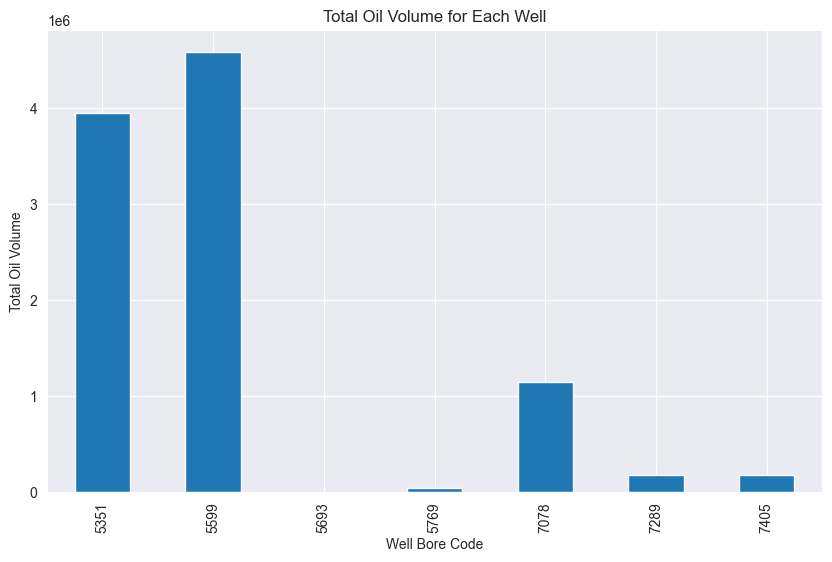

In [25]:
#Let's check each well and its production volume from oil
grouped = df.groupby('NPD_WELL_BORE_CODE')['BORE_OIL_VOL'].sum()

plt.figure(figsize=(10,6))
grouped.plot(kind='bar')
plt.xlabel('Well Bore Code')
plt.ylabel('Total Oil Volume')
plt.title('Total Oil Volume for Each Well')
plt.show()


So, as we could see the main production is producing from only two wells which are <5351 and 5599>. And th one of the wells are not producing any oil which may be a water injector or something(we'll check this in the next up coming steps further). Moreover, the three wells <7289, 7405 and 5769> are too small in production rate compareing to the main two as we mentioned earlier, in the next coming steps we'll see the main truth behind them in more detail.

In [72]:
# Let's look at type of our wells:
df['WELL_TYPE'].unique()

array(['OP', 'WI'], dtype=object)

Since we have 7 wells, and we have two type of our wells in our dataset which are(producer, injector), lets separate each well type from each other to see which one is producer or injector from these 7 wells

In [103]:
producer_wells = df[df['WELL_TYPE'] == 'OP']['NPD_WELL_BORE_CODE']
producer_wells

0        7405
1        7405
2        7405
3        7405
4        7405
         ... 
15827    7289
15828    7289
15829    7289
15830    7289
15831    7289
Name: NPD_WELL_BORE_CODE, Length: 9342, dtype: int64

In [104]:
producer_wells.unique()

array([7405, 7078, 5599, 5351, 7289, 5769], dtype=int64)

So we have 6 producers

In [105]:
injector_wells = df[df['WELL_TYPE'] == 'WI']['NPD_WELL_BORE_CODE']
injector_wells.unique()

array([7405, 5693, 5769], dtype=int64)

So we have one injector well which is 5693 and two wells that acts as producers and injectors which are (7405 and 5769)

In [106]:
df_producer_wells = df[df["WELL_TYPE"] == "OP"]

In [107]:
df_producer_wells

DATEPRD  WELL_BORE_CODE  NPD_WELL_BORE_CODE  \
0               2014-04-07   NO 15/9-F-1 C                7405   
1               2014-04-08   NO 15/9-F-1 C                7405   
2               2014-04-09   NO 15/9-F-1 C                7405   
3               2014-04-10   NO 15/9-F-1 C                7405   
4               2014-04-11   NO 15/9-F-1 C                7405   
...                    ...             ...                 ...   
15827  2009-12-21 09:36:49  NO 15/9-F-15 C                7289   
15828  2009-12-21 21:37:47  NO 15/9-F-15 C                7289   
15829  2009-12-22 16:24:17  NO 15/9-F-15 C                7289   
15830  2009-12-23 21:44:33  NO 15/9-F-15 C                7289   
15831  2009-12-25 19:34:50  NO 15/9-F-15 C                7289   

      NPD_WELL_BORE_NAME  NPD_FIELD_CODE NPD_FIELD_NAME  NPD_FACILITY_CODE  \
0             15/9-F-1 C         3420717          VOLVE             369304   
1             15/9-F-1 C         3420717          VOLVE             369304   
2             15/9-F-1 C         3420717          VOLVE             369304   
3             15/9-F-1 C         3420717          VOLVE             369304   
4             15/9-F-1 C         3420717          VOLVE             369304   
...                  ...             ...            ...                ...   
15827          15/9-F-15         3420717          VOLVE             369304   
15828          15/9-F-15         3420717          VOLVE             369304   
15829          15/9-F-15         3420717          VOLVE             369304   
15830          15/9-F-15         3420717          VOLVE             369304   
15831          15/9-F-15         3420717          VOLVE             369304   

      NPD_FACILITY_NAME  ON_STREAM_HRS  AVG_DOWNHOLE_PRESSURE  \
0        MÆRSK INSPIRER       0.000000                0.00000   
1        MÆRSK INSPIRER       0.000000                    NaN   
2        MÆRSK INSPIRER       0.000000                    NaN   
3        MÆRSK INSPIRER       0.000000                    NaN   
4        MÆRSK INSPIRER       0.000000              310.37614   
...                 ...            ...                    ...   
15827    MÆRSK INSPIRER       9.613611              276.06430   
15828    MÆRSK INSPIRER      12.016111              276.13684   
15829    MÆRSK INSPIRER      18.775000              275.92102   
15830    MÆRSK INSPIRER      29.337778              275.53076   
15831    MÆRSK INSPIRER      45.838056              274.99036   

       AVG_DOWNHOLE_TEMPERATURE  AVG_DP_TUBING  AVG_ANNULUS_PRESS  \
0                       0.00000        0.00000                0.0   
1                           NaN            NaN                0.0   
2                           NaN            NaN                0.0   
3                           NaN            NaN                0.0   
4                      96.87589      277.27826                0.0   
...                         ...            ...                ...   
15827                       NaN            NaN                NaN   
15828                       NaN            NaN                NaN   
15829                       NaN            NaN                NaN   
15830                       NaN            NaN                NaN   
15831                       NaN            NaN                NaN   

       AVG_CHOKE_SIZE_P AVG_CHOKE_UOM  AVG_WHP_P  AVG_WHT_P  DP_CHOKE_SIZE  \
0              0.000000             %    0.00000    0.00000        0.00000   
1              1.003059             %    0.00000    0.00000        0.00000   
2              0.979008             %    0.00000    0.00000        0.00000   
3              0.545759             %    0.00000    0.00000        0.00000   
4              1.215987             %   33.09788   10.47992       33.07195   
...                 ...           ...        ...        ...            ...   
15827               NaN           NaN    0.00000        NaN            NaN   
15828               NaN           NaN    0.00000       

Now let's use our domain expertices (Petroleum Engineering) to decide which features are useful for our project and which one is not!
1. DATEPRD,
2. WELL_BORE_CODE,
3. NPD_WELL_BORE_NAME,
4. NPD_FIELD_CODE,
5. NPD_FIELD_NAME,
6. NPD_FACILITY_CODE and
7. NPD_FACILITY_NAME
8. AVG_CHOKE_UOM



these are identifiers and its not have any impact on the production rate.
So its more favorable to get these features out of our dataset and concentarte on the ones that have effect on the oil production.
So, let's drop them out

In [108]:
df_producer_wells = df_producer_wells.drop(labels=[ "WELL_BORE_CODE", "NPD_WELL_BORE_NAME", "NPD_FIELD_CODE", "NPD_FIELD_NAME", "NPD_FACILITY_CODE", "NPD_FACILITY_NAME", "AVG_CHOKE_UOM"], axis = 1)


In [109]:
df_producer_wells

DATEPRD  NPD_WELL_BORE_CODE  ON_STREAM_HRS  \
0               2014-04-07                7405       0.000000   
1               2014-04-08                7405       0.000000   
2               2014-04-09                7405       0.000000   
3               2014-04-10                7405       0.000000   
4               2014-04-11                7405       0.000000   
...                    ...                 ...            ...   
15827  2009-12-21 09:36:49                7289       9.613611   
15828  2009-12-21 21:37:47                7289      12.016111   
15829  2009-12-22 16:24:17                7289      18.775000   
15830  2009-12-23 21:44:33                7289      29.337778   
15831  2009-12-25 19:34:50                7289      45.838056   

       AVG_DOWNHOLE_PRESSURE  AVG_DOWNHOLE_TEMPERATURE  AVG_DP_TUBING  \
0                    0.00000                   0.00000        0.00000   
1                        NaN                       NaN            NaN   
2                        NaN                       NaN            NaN   
3                        NaN                       NaN            NaN   
4                  310.37614                  96.87589      277.27826   
...                      ...                       ...            ...   
15827              276.06430                       NaN            NaN   
15828              276.13684                       NaN            NaN   
15829              275.92102                       NaN            NaN   
15830              275.53076                       NaN            NaN   
15831              274.99036                       NaN            NaN   

       AVG_ANNULUS_PRESS  AVG_CHOKE_SIZE_P  AVG_WHP_P  AVG_WHT_P  \
0                    0.0          0.000000    0.00000    0.00000   
1                    0.0          1.003059    0.00000    0.00000   
2                    0.0          0.979008    0.00000    0.00000   
3                    0.0          0.545759    0.00000    0.00000   
4                    0.0          1.215987   33.09788   10.47992   
...                  ...               ...        ...        ...   
15827                NaN               NaN    0.00000        NaN   
15828                NaN               NaN    0.00000        NaN   
15829                NaN               NaN    0.00000        NaN   
15830                NaN               NaN    0.00000        NaN   
15831                NaN               NaN    0.00000        NaN   

       DP_CHOKE_SIZE  BORE_OIL_VOL  BORE_GAS_VOL  BORE_WAT_VOL  BORE_WI_VOL  \
0            0.00000           0.0           0.0           0.0          NaN   
1            0.00000           0.0           0.0           0.0          NaN   
2            0.00000           0.0           0.0           0.0          NaN   
3            0.00000           0.0           0.0           0.0          NaN   
4           33.07195           0.0           0.0           0.0          NaN   
...              ...           ...           ...           ...          ...   
15827            NaN           0.0           0.0           0.0          NaN   
15828            NaN           0.0           0.0           0.0          NaN   
15829            NaN           0.0           0.0           0.0          NaN   
15830            NaN           0.0           0.0           0.0          NaN   
15831            NaN           0.0           0.0           0.0          NaN   

        FLOW_KIND WELL_TYPE  
0      production        OP  
1      production        OP  
2      production        OP  
3      production        OP  
4      production        OP  
...           ...       ...  
15827  production        OP  
15828  production        OP  
15829  production        OP  
15830  production        OP  
15831  production        OP  

[9342 rows x 17 columns]

In [110]:
for column in df_producer_wells.columns:
    unique_values = df_producer_wells[column].unique()
    print(f"{column}': {unique_values}")

DATEPRD': ['2014-04-07' '2014-04-08' '2014-04-09' ... '2009-12-22 16:24:17'
 '2009-12-23 21:44:33' '2009-12-25 19:34:50']
NPD_WELL_BORE_CODE': [7405 7078 5599 5351 7289 5769]
ON_STREAM_HRS': [  0.          11.5         24.          13.83334     22.
  19.5         16.58333     23.83333     22.41666      0.99166
   3.875       19.16667     23.09167      8.16666     25.
  15.775       12.          13.5         14.           9.5
  17.66667     20.66666     18.66667      1.          13.69167
  14.725       10.475       18.94167      8.20833      6.45833
  16.375        9.70833      7.375       20.          10.44986
   3.29167     22.375        3.79167     16.15833      8.30847
   6.10819      1.69167     13.25833      5.65833     14.34167
  23.5         13.84167     22.075        0.74999     21.75833
  23.          20.82499      7.           0.84         4.
   5.07514     15.07486     19.64181      1.69152     18.64181
   6.35819     22.5         10.97514     16.27486      9.80848
   8.3084

(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5,
        11.5, 12.5, 13.5, 14.5, 15.5, 16.5]),
 [Text(0.5, 0, 'DATEPRD'),
  Text(1.5, 0, 'NPD_WELL_BORE_CODE'),
  Text(2.5, 0, 'ON_STREAM_HRS'),
  Text(3.5, 0, 'AVG_DOWNHOLE_PRESSURE'),
  Text(4.5, 0, 'AVG_DOWNHOLE_TEMPERATURE'),
  Text(5.5, 0, 'AVG_DP_TUBING'),
  Text(6.5, 0, 'AVG_ANNULUS_PRESS'),
  Text(7.5, 0, 'AVG_CHOKE_SIZE_P'),
  Text(8.5, 0, 'AVG_WHP_P'),
  Text(9.5, 0, 'AVG_WHT_P'),
  Text(10.5, 0, 'DP_CHOKE_SIZE'),
  Text(11.5, 0, 'BORE_OIL_VOL'),
  Text(12.5, 0, 'BORE_GAS_VOL'),
  Text(13.5, 0, 'BORE_WAT_VOL'),
  Text(14.5, 0, 'BORE_WI_VOL'),
  Text(15.5, 0, 'FLOW_KIND'),
  Text(16.5, 0, 'WELL_TYPE')])

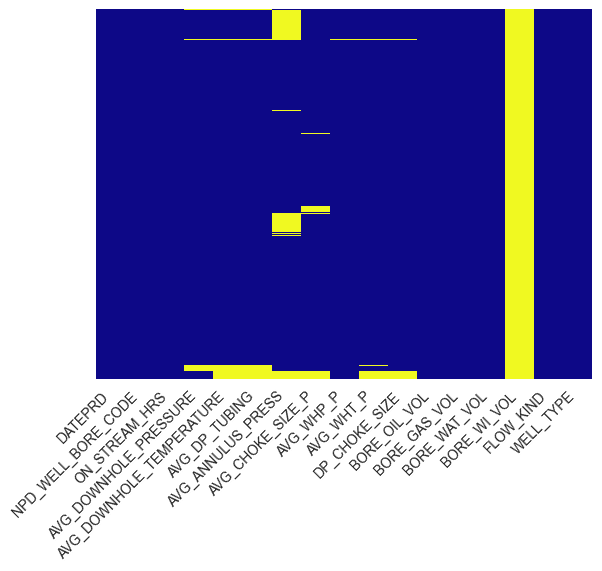

In [35]:
sns.heatmap(df_producer_wells.isnull(),yticklabels=False,cbar=False,cmap='plasma')
plt.xticks(rotation = 45, ha = 'right')

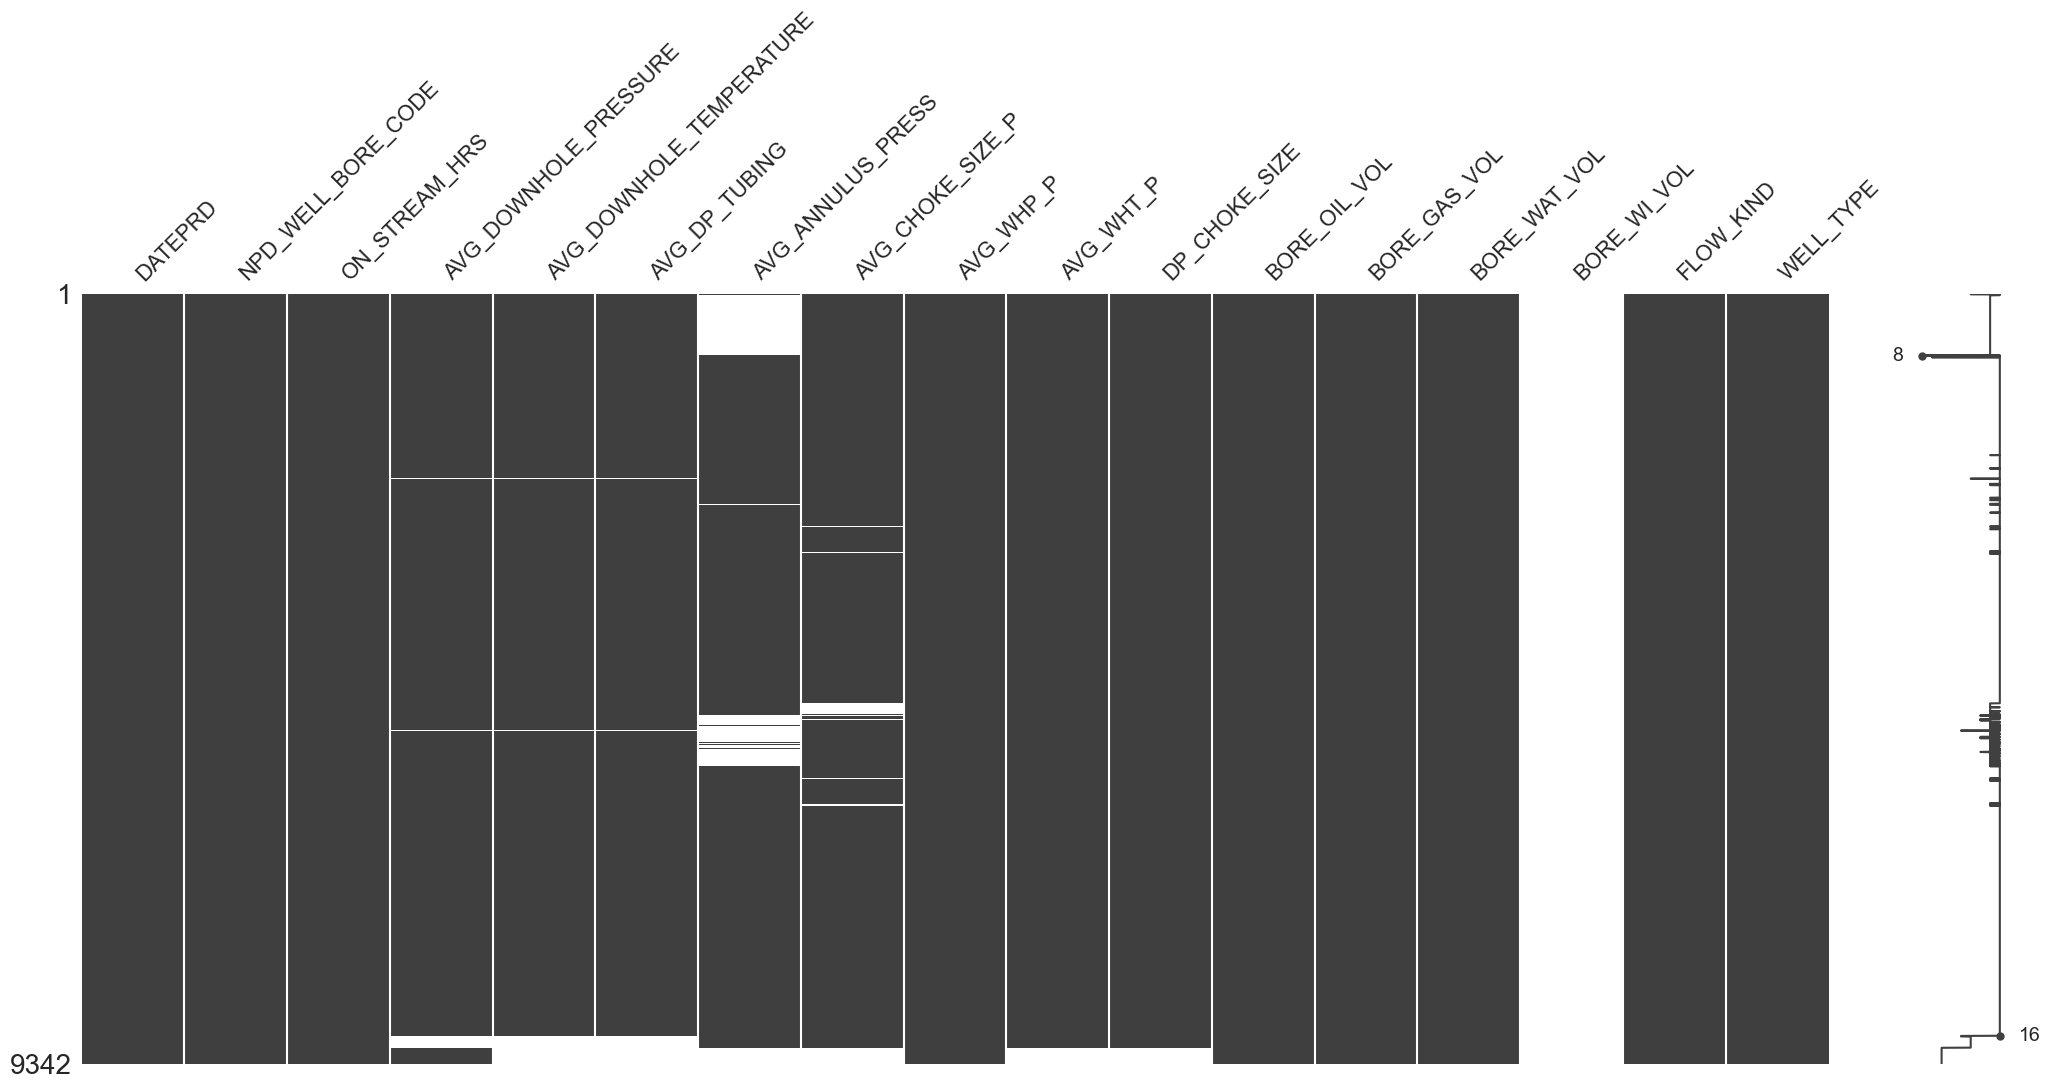

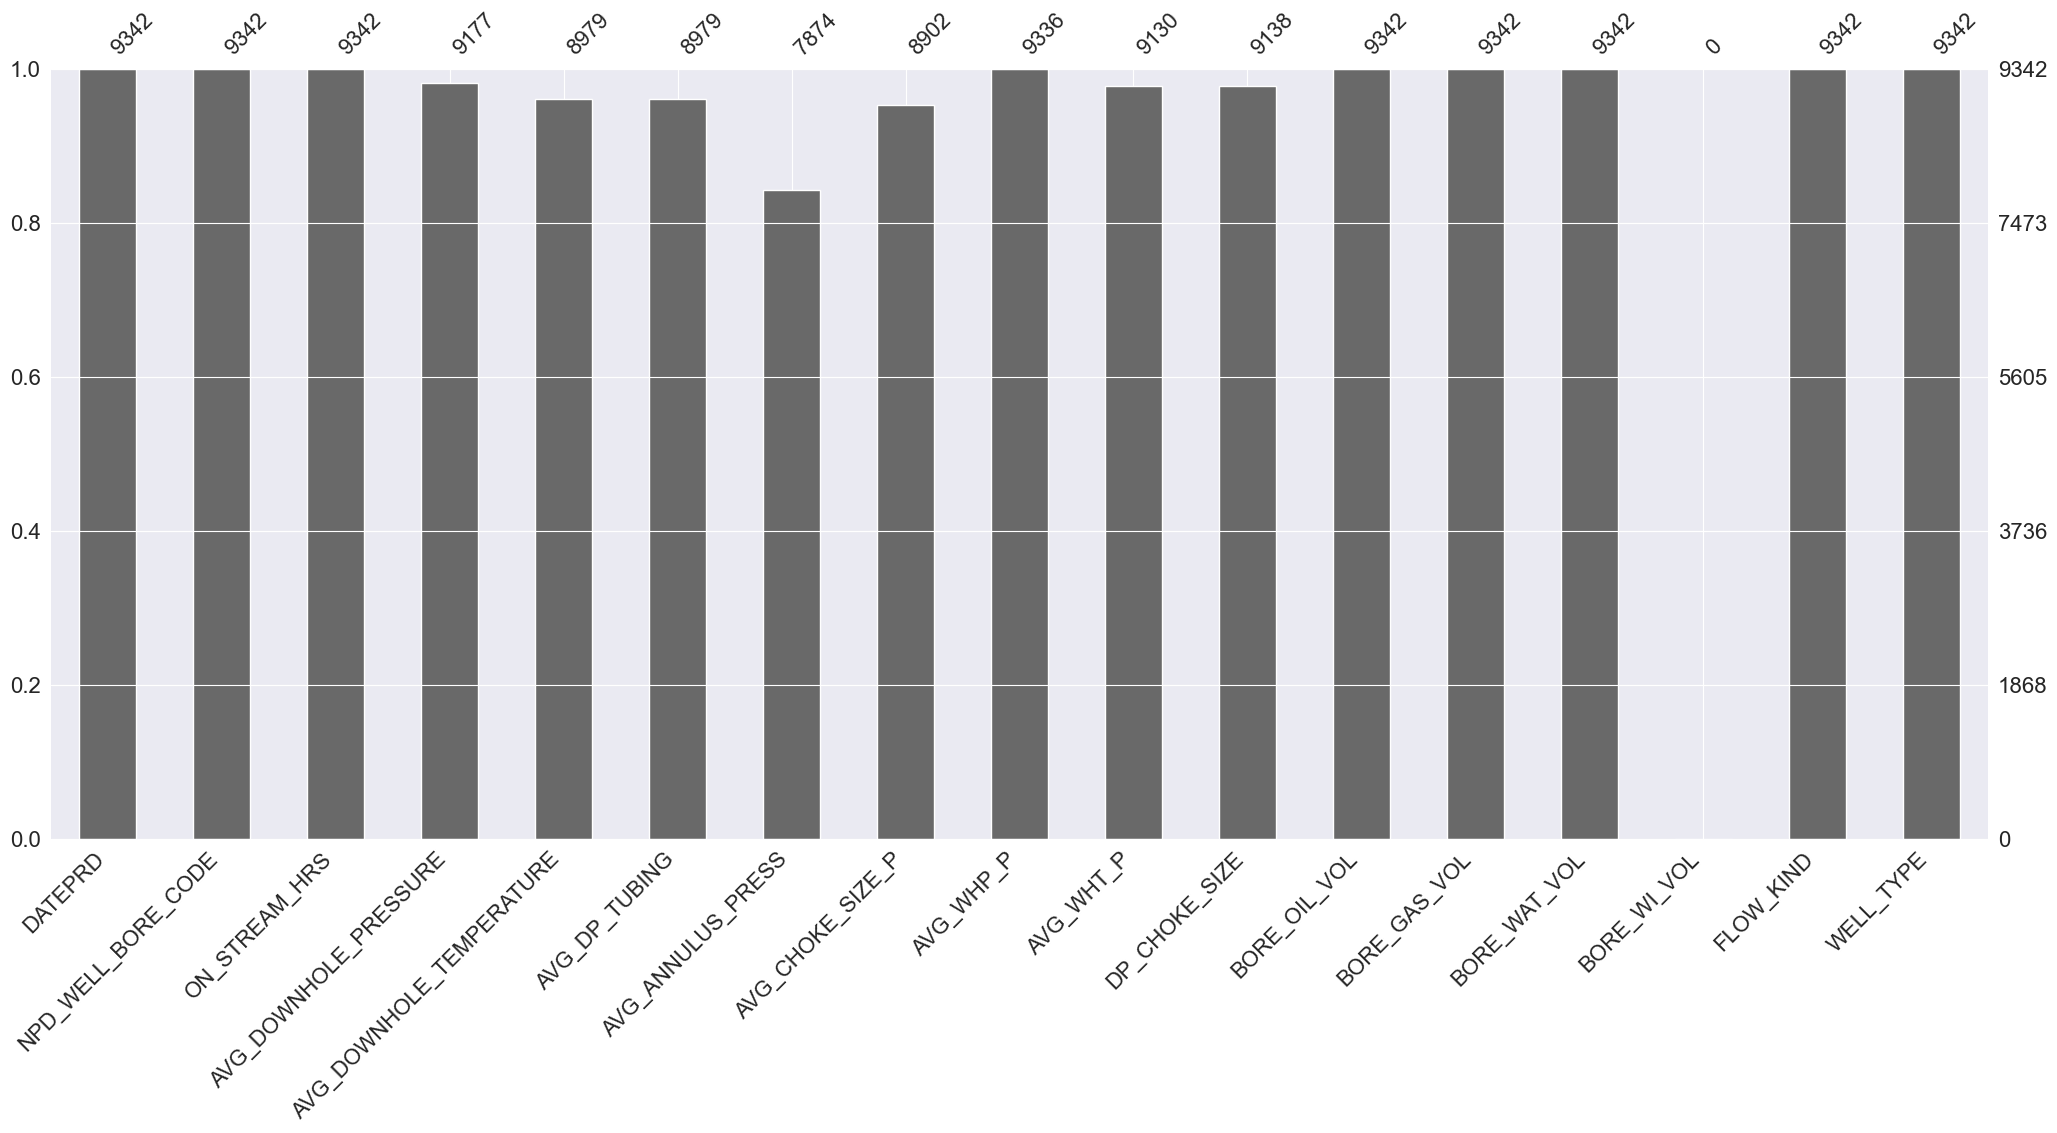

In [36]:
#Let's visualize the missing values in our daataset
msno.matrix(df_producer_wells)
plt.show()

# Plot a bar chart to show the completeness of each column
msno.bar(df_producer_wells)
plt.show()


The diagram is telling! I think it's much clearer now after kicking out all the secondary features from our dataset and just focusing on the primary features that have a dirct impact on the production rate. We notice that, there is only one column empty <NaN> in our diagram which is <BORE_WI_VOL> water volume ands the reason for that is we only took the producer wells as we said earlier.

In [81]:
df_producer_wells['NPD_WELL_BORE_CODE'].value_counts()

5599    3056
5351    3056
7289    1176
7078    1165
7405     745
5769     144
Name: NPD_WELL_BORE_CODE, dtype: int64

Now, lets plot those 6 oil producer wells that we concluded in our data to see how much each one of them produce oil by using seaborn "ecdfplot"plot


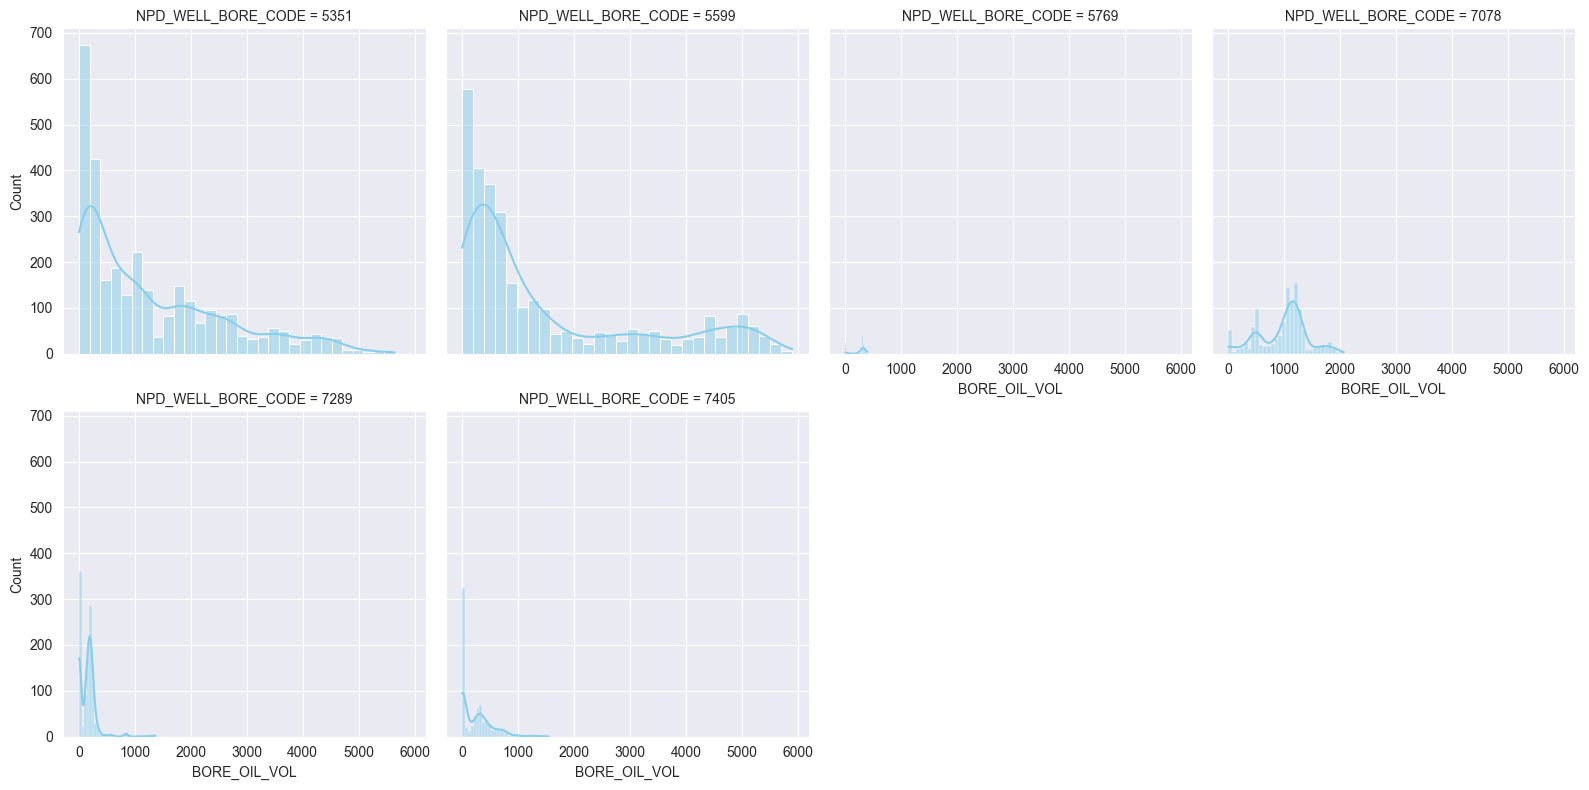

In [38]:
g = sns.FacetGrid(df_producer_wells, col='NPD_WELL_BORE_CODE', col_wrap=4, height=4, aspect=1)
g.map(sns.histplot, 'BORE_OIL_VOL', kde=True, color='skyblue', bins=30)
plt.show()


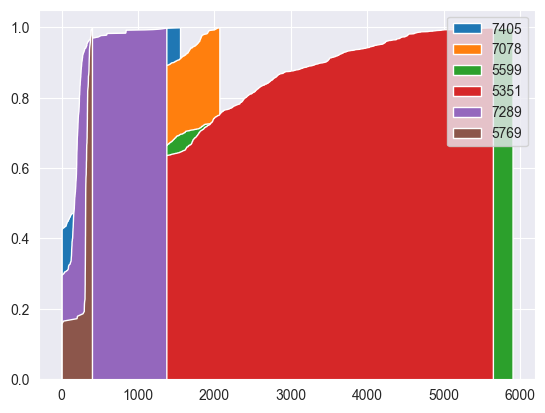

In [39]:
plt.figure()
for well_bore_code in df_producer_wells['NPD_WELL_BORE_CODE'].unique():
    subset = df_producer_wells[df_producer_wells['NPD_WELL_BORE_CODE'] == well_bore_code]
    subset = subset.sort_values(by='BORE_OIL_VOL')
    cumulative_counts = np.arange(1, len(subset) + 1) / len(subset)
    plt.stackplot(subset['BORE_OIL_VOL'], cumulative_counts, labels=[well_bore_code])
plt.legend()
plt.show()


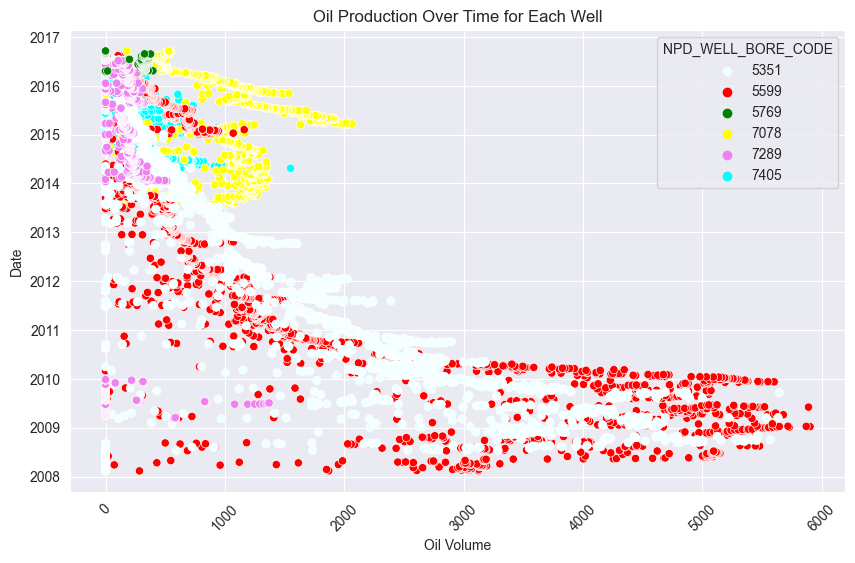

In [40]:
df_producer_wells['DATEPRD'] = pd.to_datetime(df_producer_wells['DATEPRD'])

plt.figure(figsize=(10,6))

palette = ['azure', 'red', 'green', 'yellow', 'violet', 'aqua']

sns.scatterplot(data=df_producer_wells, y='DATEPRD', x='BORE_OIL_VOL', hue='NPD_WELL_BORE_CODE', palette=palette)

plt.title('Oil Production Over Time for Each Well')
plt.xlabel('Oil Volume')
plt.ylabel('Date')

plt.xticks(rotation=45)

plt.show()


Interpertaions :
1. The well 5599 & 5351 are the most producers among the others
2. Its seems sometimes the wells are shut in and we come check that from our excell data by looking at stream houres.
3. The wells 7405, 7078, 5769 are begin to producing after 2013.After the wells 5599 & 5351 production rate declined.


C:\Users\algak\AppData\Local\Temp\ipykernel_18400\4282891720.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df_producer_wells.corr(),square=True,cmap='RdYlGn')


<Axes: >

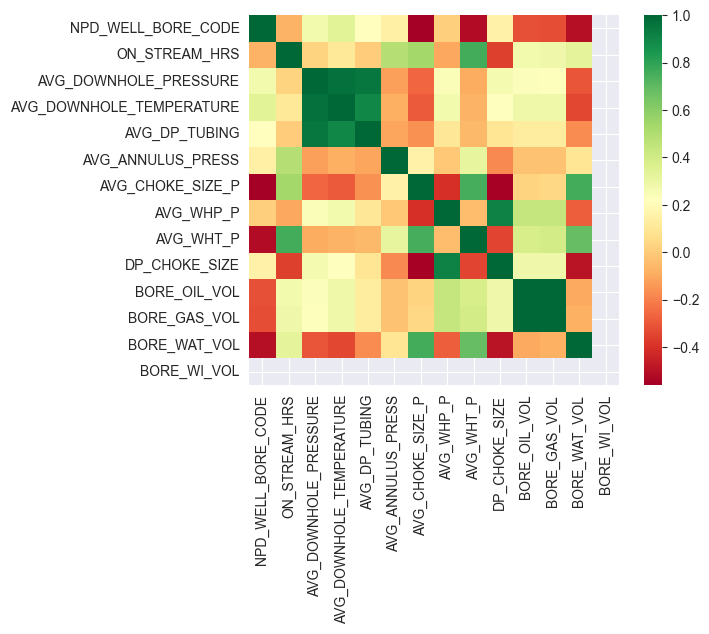

In [41]:
sns.heatmap(df_producer_wells.corr(),square=True,cmap='RdYlGn')


In [111]:
pd.set_option('display.max_columns', None)  # Display all columns
df_producer_wells.isnull().sum()



DATEPRD                        0
NPD_WELL_BORE_CODE             0
ON_STREAM_HRS                  0
AVG_DOWNHOLE_PRESSURE        165
AVG_DOWNHOLE_TEMPERATURE     363
AVG_DP_TUBING                363
AVG_ANNULUS_PRESS           1468
AVG_CHOKE_SIZE_P             440
AVG_WHP_P                      6
AVG_WHT_P                    212
DP_CHOKE_SIZE                204
BORE_OIL_VOL                   0
BORE_GAS_VOL                   0
BORE_WAT_VOL                   0
BORE_WI_VOL                 9342
FLOW_KIND                      0
WELL_TYPE                      0
dtype: int64

In [112]:
#Let's see th unique values for each column
for column in df_producer_wells.columns:
    unique_values = df_producer_wells[column].unique()
    print(f"{column}': {unique_values}")

DATEPRD': ['2014-04-07' '2014-04-08' '2014-04-09' ... '2009-12-22 16:24:17'
 '2009-12-23 21:44:33' '2009-12-25 19:34:50']
NPD_WELL_BORE_CODE': [7405 7078 5599 5351 7289 5769]
ON_STREAM_HRS': [  0.          11.5         24.          13.83334     22.
  19.5         16.58333     23.83333     22.41666      0.99166
   3.875       19.16667     23.09167      8.16666     25.
  15.775       12.          13.5         14.           9.5
  17.66667     20.66666     18.66667      1.          13.69167
  14.725       10.475       18.94167      8.20833      6.45833
  16.375        9.70833      7.375       20.          10.44986
   3.29167     22.375        3.79167     16.15833      8.30847
   6.10819      1.69167     13.25833      5.65833     14.34167
  23.5         13.84167     22.075        0.74999     21.75833
  23.          20.82499      7.           0.84         4.
   5.07514     15.07486     19.64181      1.69152     18.64181
   6.35819     22.5         10.97514     16.27486      9.80848
   8.3084

#Now before diving in training and testing, its a good idea to kick out the remaining feature <FLOW_KIND AND WELL_TYPE>, since we already chose the only producer wells, we don't need these two features.
In addition, we don't need the <water injection feature>, so thats also be out of our dataset.

In [113]:
df_producer_wells = df_producer_wells.drop(labels=["FLOW_KIND", "WELL_TYPE", "BORE_WI_VOL", "DATEPRD"], axis = 1)


In [114]:
pd.set_option('display.max_columns', None)  # Display all columns
df_producer_wells.isnull().sum()


NPD_WELL_BORE_CODE             0
ON_STREAM_HRS                  0
AVG_DOWNHOLE_PRESSURE        165
AVG_DOWNHOLE_TEMPERATURE     363
AVG_DP_TUBING                363
AVG_ANNULUS_PRESS           1468
AVG_CHOKE_SIZE_P             440
AVG_WHP_P                      6
AVG_WHT_P                    212
DP_CHOKE_SIZE                204
BORE_OIL_VOL                   0
BORE_GAS_VOL                   0
BORE_WAT_VOL                   0
dtype: int64

Now, we're ready for next step

In [115]:
# Define the target feature
target_feature = "BORE_OIL_VOL"

features_with_missing = ["AVG_DOWNHOLE_PRESSURE", "AVG_DOWNHOLE_TEMPERATURE",
                         "AVG_DP_TUBING", "AVG_ANNULUS_PRESS",
                         "AVG_CHOKE_SIZE_P", "AVG_WHP_P", "AVG_WHT_P",
                         "DP_CHOKE_SIZE"]

for feature in features_with_missing:
    missing_values = df[feature].isnull()

    df_producer_wells.loc[missing_values, feature] = df_producer_wells.loc[~missing_values, feature].mean()

if df_producer_wells.isnull().sum().sum() == 0:
    print("All missing values have been filled.")
else:
    print("Some missing values remain in the dataset.")


All missing values have been filled.


In [116]:
df_producer_wells.isnull().sum()

NPD_WELL_BORE_CODE          0
ON_STREAM_HRS               0
AVG_DOWNHOLE_PRESSURE       0
AVG_DOWNHOLE_TEMPERATURE    0
AVG_DP_TUBING               0
AVG_ANNULUS_PRESS           0
AVG_CHOKE_SIZE_P            0
AVG_WHP_P                   0
AVG_WHT_P                   0
DP_CHOKE_SIZE               0
BORE_OIL_VOL                0
BORE_GAS_VOL                0
BORE_WAT_VOL                0
dtype: int64

Let's check if our dataset needs some more work relating to Feature Engineering like <Feature Creation, Feature Transformation or Dimensionality Reduction>

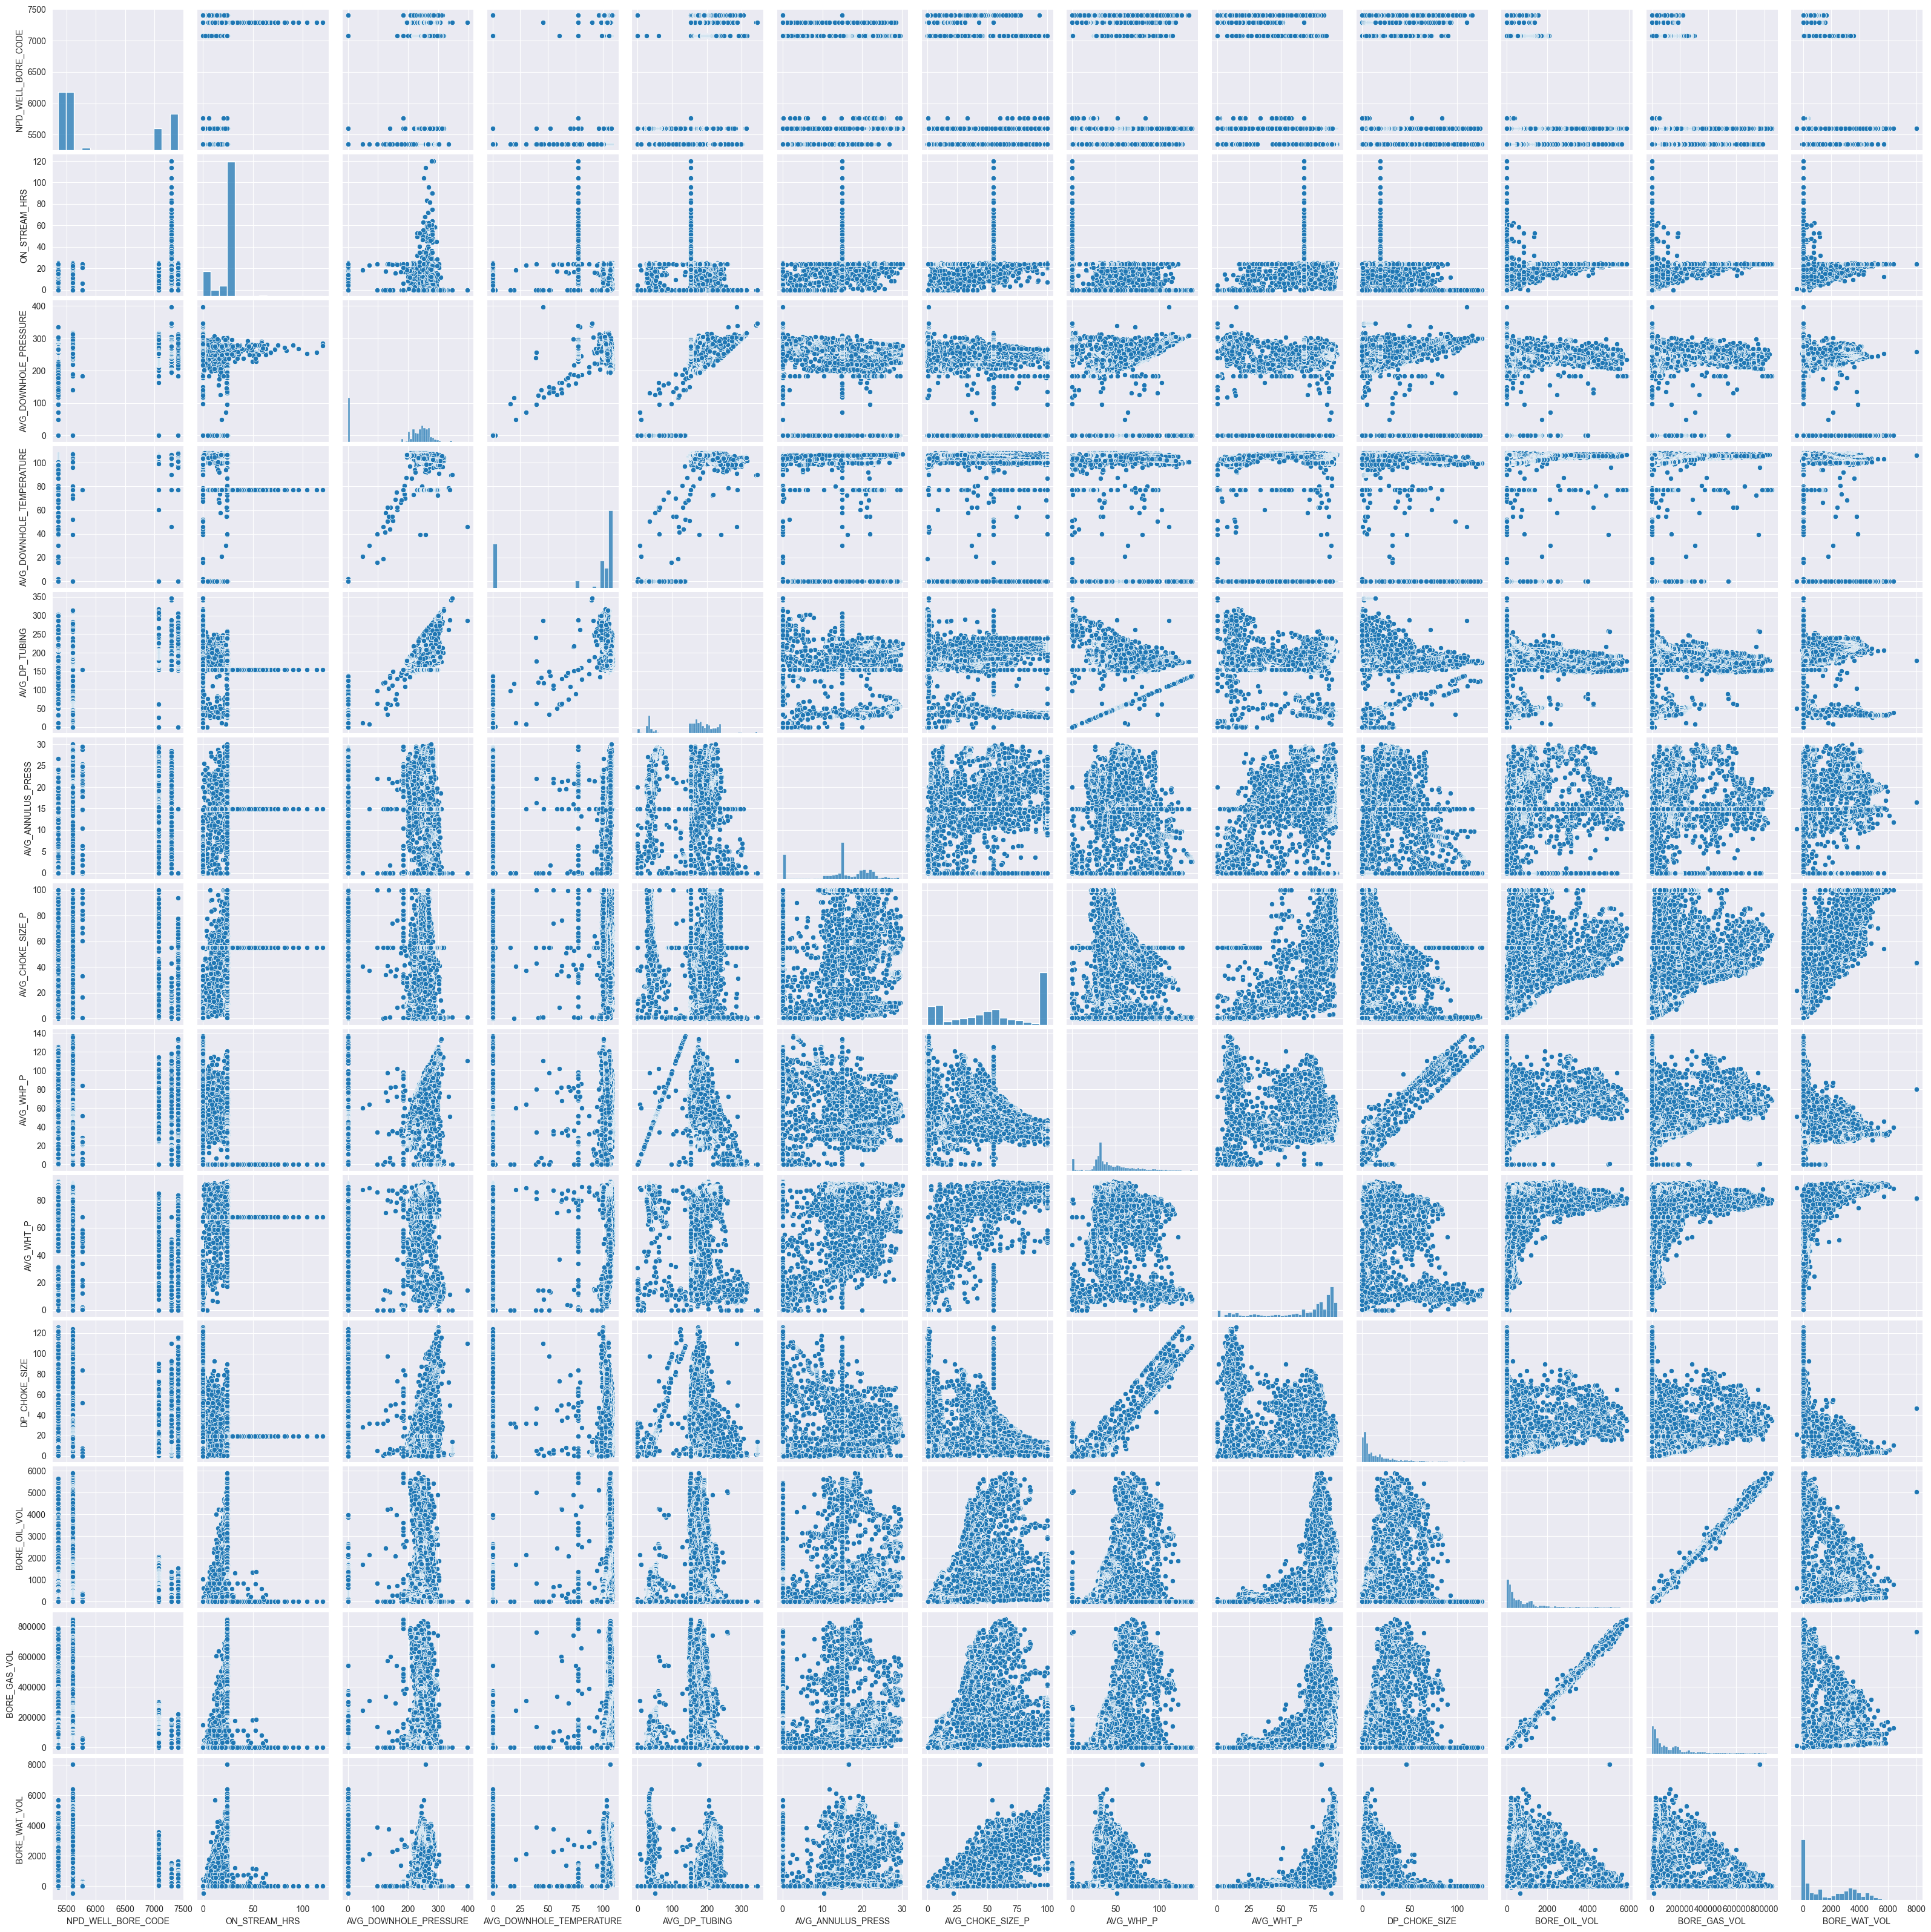

In [65]:
#One of the common methods for checking the features dependencies is <pair plot using seaborn>
sns.pairplot(df_producer_wells)


Simply let's use the statistics tabel to help us for discovering that

In [48]:
df_producer_wells.describe().T

count           mean            std      min  \
NPD_WELL_BORE_CODE        9342.0    6061.699315     836.048440  5351.00   
ON_STREAM_HRS             9342.0      20.522470       9.193614     0.00   
AVG_DOWNHOLE_PRESSURE     9342.0     183.605016     108.258951     0.00   
AVG_DOWNHOLE_TEMPERATURE  9342.0      77.159520      44.763347     0.00   
AVG_DP_TUBING             9342.0     154.027854      75.250402     0.00   
AVG_ANNULUS_PRESS         9342.0      14.862709       7.710145     0.00   
AVG_CHOKE_SIZE_P          9342.0      55.180525      35.794893     0.00   
AVG_WHP_P                 9342.0      44.473469      25.318476     0.00   
AVG_WHT_P                 9342.0      67.793752      27.360729     0.00   
DP_CHOKE_SIZE             9342.0      19.203385      22.338774     0.00   
BORE_OIL_VOL              9342.0    1077.388085    1317.863400     0.00   
BORE_GAS_VOL              9342.0  158332.610292  187407.993337     0.00   
BORE_WAT_VOL              9342.0    1643.410231    1703.356592  -457.84   

                                   25%           50%            75%  \
NPD_WELL_BORE_CODE         5351.000000   5599.000000    7078.000000   
ON_STREAM_HRS                24.000000     24.000000      24.000000   
AVG_DOWNHOLE_PRESSURE       177.817448    233.026105     256.373746   
AVG_DOWNHOLE_TEMPERATURE     66.734901    102.439684     106.229732   
AVG_DP_TUBING               137.951182    173.064640     203.614644   
AVG_ANNULUS_PRESS            12.268004     14.862709      20.561005   
AVG_CHOKE_SIZE_P             21.423164     54.738370      99.583158   
AVG_WHP_P                    30.894917     37.349482      56.432634   
AVG_WHT_P                    58.215791     79.743328      87.995437   
DP_CHOKE_SIZE                 3.427353      9.988890      26.660884   
BORE_OIL_VOL                187.730000    541.890000    1312.132500   
BORE_GAS_VOL              28877.530000  85196.800000  199829.100000   
BORE_WAT_VOL                 11.825000    911.890000    3241.500000   

                                    max  
NPD_WELL_BORE_CODE          7405.000000  
ON_STREAM_HRS                120.000000  
AVG_DOWNHOLE_PRESSURE        397.588550  
AVG_DOWNHOLE_TEMPERATURE     108.502178  
AVG_DP_TUBING                345.906770  
AVG_ANNULUS_PRESS             30.019828  
AVG_CHOKE_SIZE_P             100.000000  
AVG_WHP_P                    137.311030  
AVG_WHT_P                     93.509584  
DP_CHOKE_SIZE                125.718570  
BORE_OIL_VOL                5901.840000  
BORE_GAS_VOL              851131.520000  
BORE_WAT_VOL                8019.740000

Interpretations:
This table show us some in uncommon issues, lets dive into each one of these:
A)Outliers :
    1. BORE_WAT_VOL has a negetive volume, and the volume should not be a negative!
    2.BORE_OIL_VOL & BORE_GAS_VOL has a large differences in their values in 75% and max columns!
B)The need for Feature Scaling
    1.The range between AVG_DOWNHOLE_PRESSURE values and BORE_GAS_VOL are huge. AVG_DOWNHOLE_PRESSURE values range from 0-397 and for BORE_GAS_VOL, its values range from 0 to 851131 ! THis could effect our models in negative way, so it should be fixed !
C) The need for Feature Transformation:
    The median values (50%) and the mean values should not have too much different in their values, and here we have this issue and it should be fixed!


#Its look like the <BORE_OIL_VOL> has some outliers in it, let's fix that

In [49]:
#1. The outlier issues
Q1 = df_producer_wells['BORE_WAT_VOL'].quantile(0.25)
Q3 = df_producer_wells['BORE_WAT_VOL'].quantile(0.75)
IQR = Q3 - Q1

filter = (df_producer_wells['BORE_WAT_VOL'] >= Q1 - 1.5 * IQR) & (df_producer_wells['BORE_WAT_VOL'] <= Q3 + 1.5 *IQR)
df_producer_wells = df_producer_wells.loc[filter]


In [50]:
#2. Feature scaling
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df_producer_wells_scaled = pd.DataFrame(scaler.fit_transform(df_producer_wells), columns=df_producer_wells.columns)


In [51]:
#3. feature Transformation
import numpy as np

# Add 1 to all values to avoid division by zero
df_producer_wells['BORE_GAS_VOL'] = np.log(df_producer_wells['BORE_GAS_VOL'] + 1)


In [52]:
#1. RNN Model without Hyperparameter Tuning

In [53]:
from keras.models import Sequential
from keras.layers import SimpleRNN, Dense
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

# Select the features to use as input to the model
features = ['ON_STREAM_HRS', 'AVG_DOWNHOLE_PRESSURE', 'AVG_DOWNHOLE_TEMPERATURE', 'AVG_DP_TUBING', 'AVG_ANNULUS_PRESS', 'AVG_CHOKE_SIZE_P', 'AVG_WHP_P', 'AVG_WHT_P', 'DP_CHOKE_SIZE', 'BORE_OIL_VOL', 'BORE_GAS_VOL', 'BORE_WAT_VOL']
data = df_producer_wells[features]

# Normalize the features to be between 0 and 1
scaler = MinMaxScaler(feature_range=(0, 1))
data_scaled = scaler.fit_transform(data)

# Transform the data into sequences
X = []
y = []
sequence_length = 10  # The number of timesteps in each sample

for i in range(sequence_length, len(data_scaled)):
    X.append(data_scaled[i-sequence_length:i])
    y.append(data_scaled[i, 0])  # Assuming that 'ON_STREAM_HRS' is the target variable

X = np.array(X)
y = np.array(y)

# Split your data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the RNN model
model = Sequential()
model.add(SimpleRNN(50, activation='relu', input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

# Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test), shuffle=False)

# Evaluate the model
loss = model.evaluate(X_test, y_test)
print(f'Test loss: {loss}')

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate the Mean Squared Error between the predicted and actual values
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2_RNN_without_Tune = r2_score(y_test, y_pred)

print(f'Test MSE: {mse}')
print(f'Test MAE: {mae}')
print(f'Test R2 Score: {r2_RNN_without_Tune}')


Epoch 1/50
234/234 [==============================] - 2s 4ms/step - loss: 0.0173 - val_loss: 0.0030
Epoch 2/50
234/234 [==============================] - 1s 3ms/step - loss: 0.0028 - val_loss: 0.0024
Epoch 3/50
234/234 [==============================] - 1s 3ms/step - loss: 0.0021 - val_loss: 0.0022
Epoch 4/50
234/234 [==============================] - 1s 2ms/step - loss: 0.0018 - val_loss: 0.0021
Epoch 5/50
234/234 [==============================] - 1s 3ms/step - loss: 0.0017 - val_loss: 0.0021
Epoch 6/50
234/234 [==============================] - 1s 4ms/step - loss: 0.0017 - val_loss: 0.0020
Epoch 7/50
234/234 [==============================] - 1s 3ms/step - loss: 0.0016 - val_loss: 0.0020
Epoch 8/50
234/234 [==============================] - 1s 3ms/step - loss: 0.0016 - val_loss: 0.0019
Epoch 9/50
234/234 [==============================] - 1s 3ms/step - loss: 0.0016 - val_loss: 0.0019
Epoch 10/50
234/234 [==============================] - 1s 3ms/step - loss: 0.0015 - val_loss: 0.0019

RNN Model with Hyperparameter Tuning

In [54]:
from keras.layers import SimpleRNN, Dense
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import numpy as np
import time

# Select the features to use as input to the model
features = ['ON_STREAM_HRS', 'AVG_DOWNHOLE_PRESSURE', 'AVG_DOWNHOLE_TEMPERATURE', 'AVG_DP_TUBING', 'AVG_ANNULUS_PRESS', 'AVG_CHOKE_SIZE_P', 'AVG_WHP_P', 'AVG_WHT_P', 'DP_CHOKE_SIZE', 'BORE_OIL_VOL', 'BORE_GAS_VOL', 'BORE_WAT_VOL']
data = df_producer_wells[features]

# Normalize the features to be between 0 and 1
scaler = MinMaxScaler(feature_range=(0, 1))
data_scaled = scaler.fit_transform(data)

# Transform the data into sequences
X = []
y = []
sequence_length = 10  # The number of timesteps in each sample

for i in range(sequence_length, len(data_scaled)):
    X.append(data_scaled[i-sequence_length:i])
    y.append(data_scaled[i, 0])  # Assuming that 'ON_STREAM_HRS' is the target variable

X = np.array(X)
y = np.array(y)

# Split your data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the RNN model
model = Sequential()
model.add(SimpleRNN(100, activation='sigmoid', input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

# Start the timer
start_time = time.time()

# Train the model
history = model.fit(X_train, y_train, epochs=100, batch_size=64, validation_data=(X_test, y_test), shuffle=False)

# Stop the timer
end_time = time.time()
execution_time_RNN_with_Tuning = end_time - start_time

# Evaluate the model
loss = model.evaluate(X_test, y_test)
print(f'Test loss: {loss}')

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate the Mean Squared Error between the predicted and actual values
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2_RNN_with_Tune = r2_score(y_test, y_pred)

print(f'Test MSE: {mse}')
print(f'Test MAE: {mae}')
print(f'Test R2 Score: {r2_RNN_with_Tune}')

# Print the execution time
print(f'Execution Time: {execution_time_RNN_with_Tuning} seconds')


Epoch 1/100
117/117 [==============================] - 3s 5ms/step - loss: 0.0343 - val_loss: 0.0042
Epoch 2/100
117/117 [==============================] - 1s 5ms/step - loss: 0.0037 - val_loss: 0.0032
Epoch 3/100
117/117 [==============================] - 1s 5ms/step - loss: 0.0031 - val_loss: 0.0029
Epoch 4/100
117/117 [==============================] - 1s 5ms/step - loss: 0.0029 - val_loss: 0.0028
Epoch 5/100
117/117 [==============================] - 1s 4ms/step - loss: 0.0028 - val_loss: 0.0027
Epoch 6/100
117/117 [==============================] - 1s 5ms/step - loss: 0.0026 - val_loss: 0.0026
Epoch 7/100
117/117 [==============================] - 1s 5ms/step - loss: 0.0025 - val_loss: 0.0024
Epoch 8/100
117/117 [==============================] - 0s 4ms/step - loss: 0.0024 - val_loss: 0.0022
Epoch 9/100
117/117 [==============================] - 0s 4ms/step - loss: 0.0023 - val_loss: 0.0021
Epoch 10/100
117/117 [==============================] - 0s 4ms/step - loss: 0.0022 - val_lo

In the previous test, we doubled the epoch and the neuron numbers and it gave us a lower performance

#2. LSTM Model without hyperparameter tuning

In [55]:
from keras.models import Sequential
from keras.layers import LSTM, Dense
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler

# Select the features to use as input to the model
features = ['ON_STREAM_HRS', 'AVG_DOWNHOLE_PRESSURE', 'AVG_DOWNHOLE_TEMPERATURE', 'AVG_DP_TUBING', 'AVG_ANNULUS_PRESS', 'AVG_CHOKE_SIZE_P', 'AVG_WHP_P', 'AVG_WHT_P', 'DP_CHOKE_SIZE', 'BORE_OIL_VOL', 'BORE_GAS_VOL', 'BORE_WAT_VOL']
data = df_producer_wells[features]

# Normalize the features to be between 0 and 1
scaler = MinMaxScaler(feature_range=(0, 1))
data_scaled = scaler.fit_transform(data)

# Transform the data into sequences
X = []
y = []
sequence_length = 10  # The number of timesteps in each sample

for i in range(sequence_length, len(data_scaled)):
    X.append(data_scaled[i-sequence_length:i])
    y.append(data_scaled[i, 0])  # Assuming that 'ON_STREAM_HRS' is the target variable

X = np.array(X)
y = np.array(y)

# Split your data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the LSTM model
model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

# Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test), shuffle=False)

# Evaluate the model
loss = model.evaluate(X_test, y_test)
print(f'Test loss: {loss}')

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate the Mean Squared Error between the predicted and actual values
mse = mean_squared_error(y_test, y_pred)
print(f'Test MSE: {mse}')


Epoch 1/50
234/234 [==============================] - 2s 5ms/step - loss: 0.0031 - val_loss: 0.0027
Epoch 2/50
234/234 [==============================] - 1s 4ms/step - loss: 0.0021 - val_loss: 0.0026
Epoch 3/50
234/234 [==============================] - 1s 5ms/step - loss: 0.0020 - val_loss: 0.0025
Epoch 4/50
234/234 [==============================] - 1s 4ms/step - loss: 0.0019 - val_loss: 0.0024
Epoch 5/50
234/234 [==============================] - 1s 4ms/step - loss: 0.0018 - val_loss: 0.0023
Epoch 6/50
234/234 [==============================] - 1s 4ms/step - loss: 0.0018 - val_loss: 0.0022
Epoch 7/50
234/234 [==============================] - 1s 5ms/step - loss: 0.0017 - val_loss: 0.0021
Epoch 8/50
234/234 [==============================] - 1s 4ms/step - loss: 0.0017 - val_loss: 0.0020
Epoch 9/50
234/234 [==============================] - 1s 5ms/step - loss: 0.0016 - val_loss: 0.0020
Epoch 10/50
234/234 [==============================] - 1s 6ms/step - loss: 0.0016 - val_loss: 0.0020

In [56]:
from sklearn.metrics import mean_absolute_error, r2_score

# Calculate the Mean Absolute Error between the predicted and actual values
mae = mean_absolute_error(y_test, y_pred)
print(f'Test MAE: {mae}')

# Calculate the Root Mean Squared Error between the predicted and actual values
rmse = np.sqrt(mse)
print(f'Test RMSE: {rmse}')

# Calculate the R^2 score
r2_LSTM_without_Tune = r2_score(y_test, y_pred)
print(f'Test R^2 Score: {r2_LSTM_without_Tune}')


Test MAE: 0.017657140232475017
Test RMSE: 0.040984187297187766
Test R^2 Score: 0.7086929627003453


In [57]:
#LSTM with hyperparameter tuning

In [58]:
from keras.layers import LSTM, Dense, Dropout
from keras.callbacks import EarlyStopping
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import numpy as np
import time

# Select the features to use as input to the model
features = ['ON_STREAM_HRS', 'AVG_DOWNHOLE_PRESSURE', 'AVG_DOWNHOLE_TEMPERATURE', 'AVG_DP_TUBING', 'AVG_ANNULUS_PRESS', 'AVG_CHOKE_SIZE_P', 'AVG_WHP_P', 'AVG_WHT_P', 'DP_CHOKE_SIZE', 'BORE_OIL_VOL', 'BORE_GAS_VOL', 'BORE_WAT_VOL']
data = df_producer_wells[features]

# Normalize the features to be between 0 and 1
scaler = MinMaxScaler(feature_range=(0, 1))
data_scaled = scaler.fit_transform(data)

# Transform the data into sequences
X = []
y = []
sequence_length = 10  # The number of timesteps in each sample

for i in range(sequence_length, len(data_scaled)):
    X.append(data_scaled[i-sequence_length:i])
    y.append(data_scaled[i, 0])  # Assuming that 'ON_STREAM_HRS' is the target variable

X = np.array(X)
y = np.array(y)

# Split your data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the LSTM model
model = Sequential()
model.add(LSTM(50, activation='relu', return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dropout(0.2))  # Add dropout with a probability of 0.2
model.add(LSTM(50, activation='relu'))
model.add(Dropout(0.2))  # Add dropout with a probability of 0.2
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

# Define early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=10)

# Start the timer
start_time = time.time()

# Train the model
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test), shuffle=False, callbacks=[early_stopping])

# Stop the timer
end_time = time.time()
execution_time_LSTM_with_Tuning = end_time - start_time

# Evaluate the model
loss = model.evaluate(X_test, y_test)
print(f'Test loss: {loss}')

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate the Mean Squared Error between the predicted and actual values
mse = mean_squared_error(y_test, y_pred)
print(f'Test MSE: {mse}')

# Calculate the Mean Absolute Error between the predicted and actual values
mae = mean_absolute_error(y_test, y_pred)
print(f'Test MAE: {mae}')

# Calculate the R2 Score between the predicted and actual values
r2_LSTM_with_Tune = r2_score(y_test, y_pred)
print(f'Test R2 Score: {r2_LSTM_with_Tune}')

# Print the execution time
print(f'Execution Time: {execution_time_LSTM_with_Tuning} seconds')


Epoch 1/100
234/234 [==============================] - 6s 10ms/step - loss: 0.0043 - val_loss: 0.0030
Epoch 2/100
234/234 [==============================] - 2s 9ms/step - loss: 0.0030 - val_loss: 0.0028
Epoch 3/100
234/234 [==============================] - 3s 11ms/step - loss: 0.0027 - val_loss: 0.0026
Epoch 4/100
234/234 [==============================] - 2s 10ms/step - loss: 0.0025 - val_loss: 0.0026
Epoch 5/100
234/234 [==============================] - 2s 10ms/step - loss: 0.0023 - val_loss: 0.0025
Epoch 6/100
234/234 [==============================] - 2s 10ms/step - loss: 0.0022 - val_loss: 0.0025
Epoch 7/100
234/234 [==============================] - 2s 10ms/step - loss: 0.0021 - val_loss: 0.0024
Epoch 8/100
234/234 [==============================] - 3s 11ms/step - loss: 0.0020 - val_loss: 0.0023
Epoch 9/100
234/234 [==============================] - 2s 11ms/step - loss: 0.0020 - val_loss: 0.0021
Epoch 10/100
234/234 [==============================] - 2s 10ms/step - loss: 0.0020

1. For the number of neurons, we chose (50 neuron) based on the "Try and Erorr", which was the best option for our project. More neurons lead to "Over-fitting" and longer training time.
2. For activation Function, we chose "Rectified Linear Unit or (ReLU) function", why? casue its usually use for different types of tasks. in addition to its ability for handling different types of problems.


In [59]:
df_producer_wells.describe().T

count         mean          std      min  \
NPD_WELL_BORE_CODE        9342.0  6061.699315   836.048440  5351.00   
ON_STREAM_HRS             9342.0    20.522470     9.193614     0.00   
AVG_DOWNHOLE_PRESSURE     9342.0   183.605016   108.258951     0.00   
AVG_DOWNHOLE_TEMPERATURE  9342.0    77.159520    44.763347     0.00   
AVG_DP_TUBING             9342.0   154.027854    75.250402     0.00   
AVG_ANNULUS_PRESS         9342.0    14.862709     7.710145     0.00   
AVG_CHOKE_SIZE_P          9342.0    55.180525    35.794893     0.00   
AVG_WHP_P                 9342.0    44.473469    25.318476     0.00   
AVG_WHT_P                 9342.0    67.793752    27.360729     0.00   
DP_CHOKE_SIZE             9342.0    19.203385    22.338774     0.00   
BORE_OIL_VOL              9342.0  1077.388085  1317.863400     0.00   
BORE_GAS_VOL              9342.0     9.981446     4.115461     0.00   
BORE_WAT_VOL              9342.0  1643.410231  1703.356592  -457.84   

                                  25%          50%          75%          max  
NPD_WELL_BORE_CODE        5351.000000  5599.000000  7078.000000  7405.000000  
ON_STREAM_HRS               24.000000    24.000000    24.000000   120.000000  
AVG_DOWNHOLE_PRESSURE      177.817448   233.026105   256.373746   397.588550  
AVG_DOWNHOLE_TEMPERATURE    66.734901   102.439684   106.229732   108.502178  
AVG_DP_TUBING              137.951182   173.064640   203.614644   345.906770  
AVG_ANNULUS_PRESS           12.268004    14.862709    20.561005    30.019828  
AVG_CHOKE_SIZE_P            21.423164    54.738370    99.583158   100.000000  
AVG_WHP_P                   30.894917    37.349482    56.432634   137.311030  
AVG_WHT_P                   58.215791    79.743328    87.995437    93.509584  
DP_CHOKE_SIZE                3.427353     9.988890    26.660884   125.718570  
BORE_OIL_VOL               187.730000   541.890000  1312.132500  5901.840000  
BORE_GAS_VOL                10.270854    11.352731    12.205223    13.654323  
BORE_WAT_VOL                11.825000   911.890000  3241.500000  8019.740000

In [117]:
# Define the boundaries for the classes
low_threshold = df_producer_wells['BORE_OIL_VOL'].quantile(0.25)
high_threshold = df_producer_wells['BORE_OIL_VOL'].quantile(0.75)

# Create a new column for the class
df_producer_wells['BORE_OIL_VOL_CLASS'] = 'medium'
df_producer_wells.loc[df_producer_wells['BORE_OIL_VOL'] < low_threshold, 'BORE_OIL_VOL_CLASS'] = 'low'
df_producer_wells.loc[df_producer_wells['BORE_OIL_VOL'] > high_threshold, 'BORE_OIL_VOL_CLASS'] = 'high'


In [118]:
from sklearn.preprocessing import LabelEncoder

# Initialize the encoder
le = LabelEncoder()

# Fit the encoder and transform the target variable
df_producer_wells['BORE_OIL_VOL_CLASS'] = le.fit_transform(df_producer_wells['BORE_OIL_VOL_CLASS'])


In [119]:
from sklearn.model_selection import train_test_split

# Define your features and target variable
X = df_producer_wells.drop(['BORE_OIL_VOL', 'BORE_OIL_VOL_CLASS'], axis=1)
y = df_producer_wells['BORE_OIL_VOL_CLASS']

# Split your data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Now you can train your classification models using X_train and y_train, and evaluate them using X_test and y_test


3. MLP Model without Hyperparameter Tuning, The problem as CLASSIFICATION TASK

In [121]:
#MLP
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam

# Define the number of layers to experiment with
num_layers = [1, 2, 3, 4, 5]

for i in num_layers:
    # Initialize the model
    model = Sequential()

    # Add the input layer
    model.add(Dense(32, input_dim=X_train.shape[1], activation='relu'))

    # Add the hidden layers
    for _ in range(i):
        model.add(Dense(16, activation='relu'))

    # Add the output layer
    model.add(Dense(1, activation='sigmoid'))

    # Compile the model
    model.compile(loss='binary_crossentropy', optimizer=Adam(), metrics=['accuracy'])

    # Train the model
    model.fit(X_train, y_train, epochs=100, batch_size=32, verbose=0)

    # Evaluate the model
    _, accuracy_MLP_without_Tune = model.evaluate(X_test, y_test, verbose=0)

    print(f'Number of Hidden Layers: {i}, Accuracy: {accuracy_MLP_without_Tune}')


Number of Hidden Layers: 1, Accuracy: 0.34403425455093384
Number of Hidden Layers: 2, Accuracy: 0.34884965419769287
Number of Hidden Layers: 3, Accuracy: 0.352059930562973
Number of Hidden Layers: 4, Accuracy: 0.352059930562973
Number of Hidden Layers: 5, Accuracy: 0.346174418926239


# MLP with Hyperparameter Tuning

In [120]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score
import time

# Define the hyperparameters
parameters = {
    'hidden_layer_sizes': [(50,50,50), (50,100,50), (100,)],
    'activation': ['tanh', 'relu'],
    'solver': ['sgd', 'adam'],
    'alpha': [0.0001, 0.05],
    'learning_rate': ['constant','adaptive'],
}

# Initialize the classifier
mlp = MLPClassifier(max_iter=100)

# Start the timer
start_time = time.time()

# Initialize the GridSearchCV
clf = GridSearchCV(mlp, parameters, n_jobs=-1, cv=3)

# Fit the data to the GridSearchCV
clf.fit(X_train, y_train)

# Make predictions on the test set
y_pred = clf.predict(X_test)
y_pred_proba = clf.predict_proba(X_test)

# Stop the timer
end_time = time.time()
execution_time_MLP_with_Tuning = end_time - start_time

# Calculate the performance metrics
accuracy_MLP_with_Tune = accuracy_score(y_test, y_pred)
confusion_MLP_with_Tune = confusion_matrix(y_test, y_pred)
report_MLP_with_Tune = classification_report(y_test, y_pred)

# ROC AUC Score
roc_auc_MLP_with_Tune = roc_auc_score(y_test, y_pred_proba, multi_class='ovr', average='weighted')

# Print the best parameters
print(f'Best parameters: {clf.best_params_}')

# Print the execution time
print(f'Execution Time: {execution_time_MLP_with_Tuning} seconds')

# Print the accuracy
print(f'Accuracy: {accuracy_MLP_with_Tune}')

# Print the confusion matrix
print(f'Confusion Matrix: \n{confusion_MLP_with_Tune}')

# Print the classification report
print(f'Classification Report: \n{report_MLP_with_Tune}')

# Print the ROC AUC Score
print(f'ROC AUC Score: {roc_auc_MLP_with_Tune}')


Best parameters: {'activation': 'relu', 'alpha': 0.0001, 'hidden_layer_sizes': (100,), 'learning_rate': 'adaptive', 'solver': 'adam'}
Execution Time: 42.12563371658325 seconds
Accuracy: 0.9625468164794008
Confusion Matrix: 
[[461   0  11]
 [  0 441  20]
 [ 29  10 897]]
Classification Report: 
              precision    recall  f1-score   support

           0       0.94      0.98      0.96       472
           1       0.98      0.96      0.97       461
           2       0.97      0.96      0.96       936

    accuracy                           0.96      1869
   macro avg       0.96      0.96      0.96      1869
weighted avg       0.96      0.96      0.96      1869

ROC AUC Score: 0.9895648885061312


For MLP model with hyperparameter tuning:
We used across-validation (GridSearchCV) for improving the model performance by finding the best hyperparameter for MLP model and finding the best configuration based on the evaluation metrics.



#ANN without Hyperparameter Tuning

In [122]:
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam

# Define the number of layers to experiment with
num_layers = [1, 2, 3, 4, 5]

for i in num_layers:
    # Initialize the model
    model = Sequential()

    # Add the input layer
    model.add(Dense(32, input_dim=X_train.shape[1], activation='relu'))

    # Add the hidden layers
    for _ in range(i):
        model.add(Dense(16, activation='relu'))

    # Add the output layer
    model.add(Dense(1, activation='sigmoid'))

    # Compile the model
    model.compile(loss='binary_crossentropy', optimizer=Adam(), metrics=['accuracy'])

    # Train the model
    model.fit(X_train, y_train, epochs=100, batch_size=32, verbose=0)

    # Evaluate the model
    _, accuracy = model.evaluate(X_test, y_test, verbose=0)

    print(f'Number of Hidden Layers: {i}, Accuracy: {accuracy}')


Number of Hidden Layers: 1, Accuracy: 0.34403425455093384
Number of Hidden Layers: 2, Accuracy: 0.34884965419769287
Number of Hidden Layers: 3, Accuracy: 0.35580524802207947
Number of Hidden Layers: 4, Accuracy: 0.35634028911590576
Number of Hidden Layers: 5, Accuracy: 0.34403425455093384


In [ ]:
#ANN with Hyperparameter Tuning

In [123]:
from keras.models import Sequential
from keras.layers import Dense
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from keras.utils import to_categorical
import numpy as np
import time

# Define your features and target variable
X = df_producer_wells.drop(['BORE_OIL_VOL', 'BORE_OIL_VOL_CLASS'], axis=1)
y = df_producer_wells['BORE_OIL_VOL_CLASS']

# Initialize the encoder
le = LabelEncoder()

# Fit the encoder and transform the target variable
y = le.fit_transform(y)

# Convert class vectors to binary class matrices (for use in categorical_crossentropy loss below)
y = to_categorical(y)

# Split your data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the constructor
model = Sequential()

# Add an input layer
model.add(Dense(12, activation='relu', input_shape=(X_train.shape[1],)))

# Add one hidden layer
model.add(Dense(8, activation='relu'))

# Add an output layer with one neuron and no activation specified
model.add(Dense(y_train.shape[1], activation='softmax'))

# Compile the model
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

# Start the timer
start_time = time.time()

# Fit the model
model.fit(X_train, y_train, epochs=20, batch_size=1, verbose=1)

# Stop the timer
end_time = time.time()
execution_time_ANN_with_Tuning_first_tune = end_time - start_time

# Predict the classes
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_test_classes = np.argmax(y_test, axis=1)

# Calculate the performance metrics
accuracy_ANN_with_tuning_first = accuracy_score(y_test_classes, y_pred_classes)
confusion_ANN_with_tuning_first = confusion_matrix(y_test_classes, y_pred_classes)
report_ANN_with_tuning_first = classification_report(y_test_classes, y_pred_classes)

print(f'Accuracy: {accuracy_ANN_with_tuning_first}')
print(f'Confusion Matrix: \n{confusion_ANN_with_tuning_first}')
print(f'Classification Report: \n{report_ANN_with_tuning_first}')

# Print the execution time
print(f'Execution Time: {execution_time_ANN_with_Tuning_first_tune} seconds')


Epoch 1/20
7473/7473 [==============================] - 9s 1ms/step - loss: 195.6826 - accuracy: 0.8682
Epoch 2/20
7473/7473 [==============================] - 8s 1ms/step - loss: 70.7359 - accuracy: 0.9099
Epoch 3/20
7473/7473 [==============================] - 8s 1ms/step - loss: 57.4234 - accuracy: 0.9221
Epoch 4/20
7473/7473 [==============================] - 7s 987us/step - loss: 37.1899 - accuracy: 0.9273
Epoch 5/20
7473/7473 [==============================] - 7s 973us/step - loss: 17.9309 - accuracy: 0.8284
Epoch 6/20
7473/7473 [==============================] - 7s 976us/step - loss: 0.8079 - accuracy: 0.7055
Epoch 7/20
7473/7473 [==============================] - 9s 1ms/step - loss: 0.6540 - accuracy: 0.7194
Epoch 8/20
7473/7473 [==============================] - 8s 1ms/step - loss: 0.5675 - accuracy: 0.7456
Epoch 9/20
7473/7473 [==============================] - 8s 1ms/step - loss: 0.6663 - accuracy: 0.7102
Epoch 10/20
7473/7473 [==============================] - 8s 1ms/step -

C:\Users\algak\PycharmProjects\Good_luck_with_your_dreams\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\algak\PycharmProjects\Good_luck_with_your_dreams\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\algak\PycharmProjects\Good_luck_with_your_dreams\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf

ANN with Hyperparameter but with different architecture

In [124]:
from keras.models import Sequential
from keras.layers import Dense
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from keras.utils import to_categorical
import numpy as np
import time

# Define your features and target variable
X = df_producer_wells.drop(['BORE_OIL_VOL', 'BORE_OIL_VOL_CLASS'], axis=1)
y = df_producer_wells['BORE_OIL_VOL_CLASS']

# Initialize the encoder
le = LabelEncoder()

# Fit the encoder and transform the target variable
y = le.fit_transform(y)

# Convert class vectors to binary class matrices (for use in categorical_crossentropy loss below)
y = to_categorical(y)

# Split your data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the constructor
model = Sequential()

# Add an input layer
model.add(Dense(32, activation='relu', input_shape=(X_train.shape[1],)))

# Add two hidden layers
model.add(Dense(64, activation='relu'))
model.add(Dense(128, activation='relu'))

# Add an output layer with one neuron and no activation specified
model.add(Dense(y_train.shape[1], activation='softmax'))

# Compile the model
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

# Start the timer
start_time = time.time()

# Fit the model
model.fit(X_train, y_train, epochs=50, batch_size=32, verbose=1)

# Stop the timer
end_time = time.time()
execution_time_ANN_with_Tuning = end_time - start_time

# Predict the classes
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_test_classes = np.argmax(y_test, axis=1)

# Calculate the performance metrics
accuracy_ANN_with_Tune = accuracy_score(y_test_classes, y_pred_classes)
confusion_ANN_with_Tune = confusion_matrix(y_test_classes, y_pred_classes)
report_ANN_with_Tune = classification_report(y_test_classes, y_pred_classes)

print(f'Accuracy: {accuracy_ANN_with_Tune}')
print(f'Confusion Matrix: \n{confusion_ANN_with_Tune}')
print(f'Classification Report: \n{report_ANN_with_Tune}')

# Print the execution time
print(f'Execution Time: {execution_time_ANN_with_Tuning} seconds')


Epoch 1/50
234/234 [==============================] - 1s 1ms/step - loss: 257.2121 - accuracy: 0.7871
Epoch 2/50
234/234 [==============================] - 0s 1ms/step - loss: 106.9214 - accuracy: 0.8702
Epoch 3/50
234/234 [==============================] - 0s 1ms/step - loss: 42.6433 - accuracy: 0.9200
Epoch 4/50
234/234 [==============================] - 0s 1ms/step - loss: 42.1558 - accuracy: 0.9240
Epoch 5/50
234/234 [==============================] - 0s 1ms/step - loss: 56.2201 - accuracy: 0.9153
Epoch 6/50
234/234 [==============================] - 0s 1ms/step - loss: 94.6593 - accuracy: 0.9087
Epoch 7/50
234/234 [==============================] - 0s 1ms/step - loss: 47.9631 - accuracy: 0.9311
Epoch 8/50
234/234 [==============================] - 0s 1ms/step - loss: 34.8666 - accuracy: 0.9350
Epoch 9/50
234/234 [==============================] - 0s 1ms/step - loss: 20.4708 - accuracy: 0.9482
Epoch 10/50
234/234 [==============================] - 0s 1ms/step - loss: 28.2332 - accu

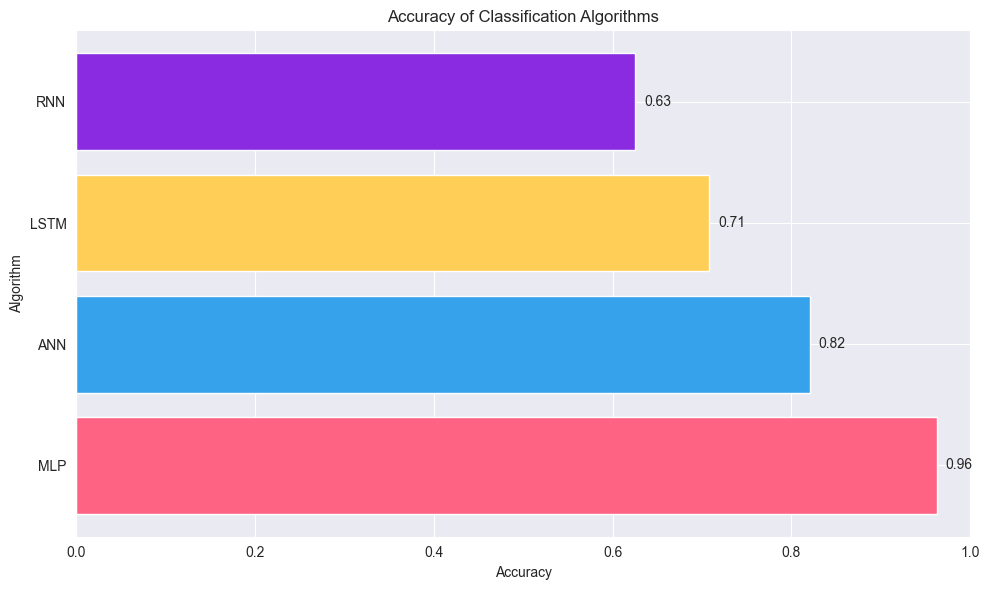

In [125]:
#Comparing all the 6 models:
# Let's create a dictionary for our 4 models names and their corresponding accuracy scores
accuracy_results = {
    'LSTM': r2_LSTM_with_Tune,
    'RNN': r2_RNN_with_Tune,
    'MLP': accuracy_MLP_with_Tune,
    'ANN': accuracy_ANN_with_Tune
}
df = pd.DataFrame(list(accuracy_results.items()), columns=['Algorithm', 'Accuracy'])

df = df.sort_values(by='Accuracy', ascending=False)

colors = ['#FF6384', '#36A2EB', '#FFCE56', '#8A2BE2'] # '#00FF00', '#FF00FF'

# Plot the accuracy results
plt.figure(figsize=(10, 6))
bars = plt.barh(df['Algorithm'], df['Accuracy'], color=colors)
plt.xlabel('Accuracy')
plt.ylabel('Algorithm')
plt.title('Accuracy of Classification Algorithms')
plt.xlim(0, 1)

# Add data labels to the bars
for bar in bars:
    width = bar.get_width()
    plt.text(width + 0.01, bar.get_y() + bar.get_height() / 2, f'{width:.2f}', va='center')

plt.tight_layout()
plt.show()


As we see, the worst performance was obtained by RNN by 63%, and the one was by MLP by 96%

In [145]:
#Now let's compare each algorithm results, from the best to worst
models = pd.DataFrame({
                'Models': ['RNN',
                           'LSTM' ,
                           'ANN' ,
                           'MLP'],

                'Score':  [ r2_RNN_with_Tune , r2_LSTM_with_Tune , accuracy_ANN_with_Tune , accuracy_MLP_with_Tune ],

                "time": [execution_time_RNN_with_Tuning , execution_time_LSTM_with_Tuning , execution_time_ANN_with_Tuning , execution_time_MLP_with_Tuning]})

models.sort_values(by='Score', ascending=True)

Models     Score        time
0    RNN  0.625542   51.491482
1   LSTM  0.708290  171.225524
2    ANN  0.820225   16.558393
3    MLP  0.962547   42.125634

This summary table shows all our models with it's training time. As we see, the BEST performance was by MLP and the worst performance was by RNN. Also, the shortest model was ANN between all our model and the longest training time was by LSTM.